Data Source

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
    

GOAL- Use machine learning to determine which physiochemical properties make a wine 'good'!

Assumption:
1) I used for random_state = 42

In [1]:
import matplotlib
import pylab as plt
import numpy as np
import pandas as pd 

In [2]:
from numpy import random

df= pd.read_csv("winequality-red.csv",na_values=['NA', '?','']) # Read data file # na values can be represented by ?, space, NA
np.random.seed(42)# undo the random error function to not chnage ur data after shuffling
#if u comment on the above function it will keep on manupulating
#pick a random number everytime
wine = df.reindex(np.random.permutation(df.index))  #shuffle data
#permutation of index
#index of pandas, randomly select indices, redindex our inces
wine.reset_index(inplace=True, drop=True) # Reset index

wine[0:5] # Display top five rows


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


In [3]:
wine.shape

(1599, 12)

There are 1599 rows and 12 columns

COMMENT - All the data is regression so no one-hot coding is required.

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


CONCLUSION - The data has no missing values and no imputation is needed.

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Look at distribution  make a histogram

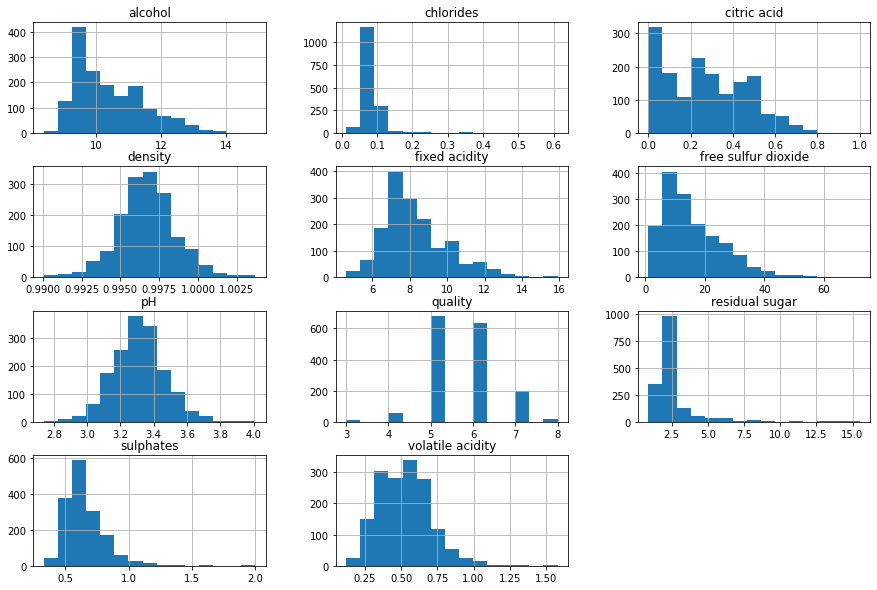

In [6]:
columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','density', 'pH','sulphates','alcohol','quality']
wine[columns].hist(bins=15, layout=(4, 3), figsize=(15,10)) # 3 rows and 3 columns # figure size is the spread of the histogram
plt.show()


Target Variable - Quality since the goal is to determine which physiochemical properties make a wine 'good'.

## Assign good quality wine where wine_quality is greater than 6.
##  The remaining wine is classified as poor quality wine

METHOD 1

In [7]:
wine["wine_quality"]=(wine["quality"]>6)*1

wine[10:20]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
10,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.80,7,1
11,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,0
12,6.7,0.480,0.08,2.1,0.064,18.0,34.0,0.99552,3.33,0.64,9.70,5,0
13,7.0,0.560,0.13,1.6,0.077,25.0,42.0,0.99629,3.34,0.59,9.20,5,0
14,7.8,0.340,0.37,2.0,0.082,24.0,58.0,0.99640,3.34,0.59,9.40,6,0
15,8.9,0.280,0.45,1.7,0.067,7.0,12.0,0.99354,3.25,0.55,12.30,7,1
16,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.99580,3.35,0.54,10.10,5,0
17,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.00,7,1
18,9.4,0.300,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.70,8,1
19,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.60,5,0


METHOD 2

In [8]:
wine["wine_quality_cat"]=np.ceil(wine["quality"]>=7) # 10 leads to most data in categories in 4 arbitary # to divide the data into a better distribution of data
#22 will work as well, just looking for an even distribution
#wine["wine_quality_cat"].where(wine["quality"] < 1, 1, inplace=True) #anything more than 4 assign to 4
#any number will work, 4 is generally chosen, bigger the # more the computation time
wine[10:20]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality,wine_quality_cat
10,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.80,7,1,1.0
11,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,0,0.0
12,6.7,0.480,0.08,2.1,0.064,18.0,34.0,0.99552,3.33,0.64,9.70,5,0,0.0
13,7.0,0.560,0.13,1.6,0.077,25.0,42.0,0.99629,3.34,0.59,9.20,5,0,0.0
14,7.8,0.340,0.37,2.0,0.082,24.0,58.0,0.99640,3.34,0.59,9.40,6,0,0.0
15,8.9,0.280,0.45,1.7,0.067,7.0,12.0,0.99354,3.25,0.55,12.30,7,1,1.0
16,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.99580,3.35,0.54,10.10,5,0,0.0
17,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.00,7,1,1.0
18,9.4,0.300,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.70,8,1,1.0
19,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.60,5,0,0.0


We see that by both of the methods any wine with quality greater than 7 has been assigned as good ie. binary as 1 in wine_quality and wine_quality_cat and vice versa

In [9]:
df=wine.copy()

## Remove Outliers 

Outliers are usually extreme high or low values that are different from pattern of majority data. A straightforward approach to detect outliers are several (n) standard deviations from the mean $m\pm n\sigma$ ($m$=mean, $\sigma$=standard deviation). For example, an outlier can be bigger than $m+ 3\sigma $ or less than $m- 3\sigma $. The following function can be used to apply this approach.  

In [10]:
def outlier_remove(df, n,name):
    """Delete rows for a specified column where values are out of +/- n*sd standard deviations
    df  : Pandas dataframe
    n   : n in the equation 𝑚±𝑛𝜎
    name: Column name
    """
    mean=df[name].mean() # Calclute mean of column
    sd=df[name].std()    # Calclute standard deviation of column
    drop_r = df.index[(mean -n * sd> df[name]) | (mean+n * sd< df[name])]# vertical line is or
    df.drop(drop_r, axis=0, inplace=True)# dropping rows that dont satisfy the code
    df.reset_index(inplace=True, drop=True) # Reset index

# Drop outliers in last column 'OIL Prod. (e3m3/month)'
outlier_remove(df, n=3,name='quality') #based on oil production
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality,wine_quality_cat
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,8.319383,0.525576,0.271605,2.538200,0.087246,15.905601,46.603524,0.996742,3.310566,0.658704,10.425928,5.652612,0.136564,0.136597
std,1.741471,0.175602,0.194337,1.410398,0.046866,10.460067,32.929680,0.001886,0.154337,0.169646,1.066592,0.782459,0.343494,0.343506
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,4.000000,0.000000,0.000000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000,0.000000
75%,9.200000,0.635000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000,0.000000,0.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000,1.000000


The number of rows have been removed so the number of rows have been reduced from 1599 to 1571.

BINARY CLASSIFICATION

Now removing quality and wine_quality

In [11]:
df_binary=df.copy()
df_binary.drop(['wine_quality_cat'], axis=1, inplace=True)
df_binary.drop(['quality'], axis=1, inplace=True)
df_binary.reset_index(inplace=True, drop=True) # Reset index
df_binary[0:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,0
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,0
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,0
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,0
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,0


Text(0, 0.5, 'Frequency')

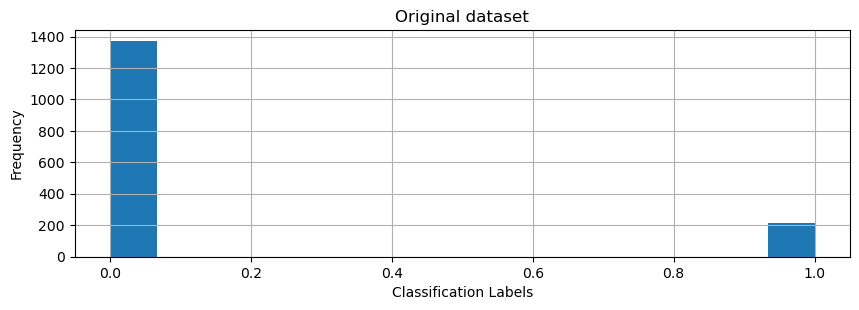

In [12]:
font = {'size'   : 10}
matplotlib.rc('font', **font)

fig = plt.subplots(figsize=(10, 3), dpi= 100, facecolor='w', edgecolor='k')


df_binary['wine_quality'].hist(bins=15)
plt.title("Original dataset")
plt.xlabel("Classification Labels")
plt.ylabel("Frequency")


In [13]:
df_binary['wine_quality'].value_counts()

0    1372
1     217
Name: wine_quality, dtype: int64

The original dataset has apprximately 199 is classified as good quality wine i.e. 12.7% of the total cases.
The original dataset has  apprximately 1372 is classified as poor quality wine ie 87.3% of the total cases.

In [14]:
df_binary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.7,0.560,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,0
1,7.8,0.500,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,0
2,10.7,0.670,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,0
3,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,0
4,6.7,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1584,9.1,0.600,0.00,1.90,0.058,5.0,10.0,0.99770,3.18,0.63,10.4,0
1585,8.2,0.635,0.10,2.10,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,0
1586,7.2,0.620,0.06,2.70,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,0
1587,7.9,0.200,0.35,1.70,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,1


**SPLIT DATA INTO TEST AND TRAINING DATA BY STARTIFIED SAMPLING**

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

# Training and Test
spt = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)#always use shuffle
for train_idx, test_idx in spt.split(df_binary, df_binary['wine_quality']):#split training and testing data based on Classes 
    train_set_strat = df_binary.loc[train_idx]
    test_set_strat  = df_binary.loc[test_idx]  
    
for dataset in (train_set_strat, test_set_strat): dataset.reset_index(inplace=True, drop=True) # Reset index
train_set_strat[0:4]    

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.99640,3.21,0.61,9.3,0
1,5.9,0.440,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7,0
2,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,0
3,9.1,0.660,0.15,3.2,0.097,9.0,59.0,0.99976,3.28,0.54,9.6,0


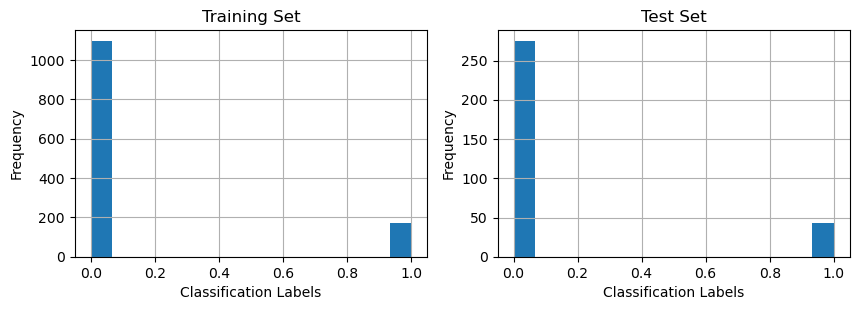

In [16]:
font = {'size'   : 10}
matplotlib.rc('font', **font)

fig = plt.subplots(figsize=(10, 3), dpi= 100, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1)
train_set_strat['wine_quality'].hist(bins=15)
plt.title("Training Set")
plt.xlabel("Classification Labels")
plt.ylabel("Frequency")

ax2=plt.subplot(1,2,2) 
test_set_strat['wine_quality'].hist(bins=15)
plt.title("Test Set")
plt.xlabel("Classification Labels")
plt.ylabel("Frequency")
plt.show()

**STRAFIED SAMPLING IN TRAINING DATASET**

In [17]:
train_set_strat['wine_quality'].value_counts()

0    1097
1     174
Name: wine_quality, dtype: int64

The training dataset has approximately 159 good quality wine i.e. 12.6% of the total cases. The training dataset has approximately 1097 aas poor quality wine i.e. 87.4% of the total cases.

**STRATIFIED SAMPLING IN TEST DATASET**

In [18]:
test_set_strat['wine_quality'].value_counts()

0    275
1     43
Name: wine_quality, dtype: int64

The test dataset has approximately 40 as good quality wine i.e. 12.6% of the total cases. The test dataset has approximately 275 as poor quality wine i.e. 87.4% of the total cases.

**conclusion**

Both the training and test dataset as well as the original dataset have almost the same ratio for good and poor quality wine. There is similar split in all the datasets.

Now setting Classification column as target

In [19]:
# Note that drop() creates a copy and does not affect train_set_strat
X_train = train_set_strat.drop("wine_quality", axis=1)# remove target
y_train = train_set_strat["wine_quality"].values# only taget values

In [20]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.99640,3.21,0.61,9.3
1,5.9,0.440,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7
2,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9
3,9.1,0.660,0.15,3.2,0.097,9.0,59.0,0.99976,3.28,0.54,9.6
4,7.9,0.720,0.17,2.6,0.096,20.0,38.0,0.99780,3.40,0.53,9.5
...,...,...,...,...,...,...,...,...,...,...,...
1266,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8
1267,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5
1268,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2
1269,7.0,0.620,0.08,1.8,0.076,8.0,24.0,0.99780,3.48,0.53,9.0


In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1271 non-null   float64
 1   volatile acidity      1271 non-null   float64
 2   citric acid           1271 non-null   float64
 3   residual sugar        1271 non-null   float64
 4   chlorides             1271 non-null   float64
 5   free sulfur dioxide   1271 non-null   float64
 6   total sulfur dioxide  1271 non-null   float64
 7   density               1271 non-null   float64
 8   pH                    1271 non-null   float64
 9   sulphates             1271 non-null   float64
 10  alcohol               1271 non-null   float64
dtypes: float64(11)
memory usage: 109.4 KB


In [22]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
y_train.shape

(1271,)

The target column -Wine Quality has been removed from the X_train datatset. The target column - Wine Quality has been set as the the y_train datatset.

# DATA VISUALIZATION

CORRELATION MATRIX

In [24]:
corr_matrix=X_train.corr() #data is Oil_Prod
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.268326,0.675981,0.146544,0.089182,-0.153752,-0.106373,0.676453,-0.681435,0.184887,-0.061642
volatile acidity,-0.268326,1.000000,-0.559032,-0.009348,0.068949,0.000937,0.093661,0.002105,0.240034,-0.243413,-0.185500
citric acid,0.675981,-0.559032,1.000000,0.161770,0.206215,-0.065928,0.028217,0.381078,-0.545670,0.315849,0.107516
residual sugar,0.146544,-0.009348,0.161770,1.000000,0.095245,0.156969,0.142678,0.388331,-0.093356,0.030549,0.026837
chlorides,0.089182,0.068949,0.206215,0.095245,1.000000,0.016203,0.074707,0.200537,-0.262957,0.380501,-0.208865
free sulfur dioxide,-0.153752,0.000937,-0.065928,0.156969,0.016203,1.000000,0.671588,-0.022514,0.061167,0.052369,-0.099497
total sulfur dioxide,-0.106373,0.093661,0.028217,0.142678,0.074707,0.671588,1.000000,0.085423,-0.074138,0.057431,-0.241980
density,0.676453,0.002105,0.381078,0.388331,0.200537,-0.022514,0.085423,1.000000,-0.344659,0.157188,-0.487399
pH,-0.681435,0.240034,-0.545670,-0.093356,-0.262957,0.061167,-0.074138,-0.344659,1.000000,-0.194210,0.209054
sulphates,0.184887,-0.243413,0.315849,0.030549,0.380501,0.052369,0.057431,0.157188,-0.194210,1.000000,0.100516


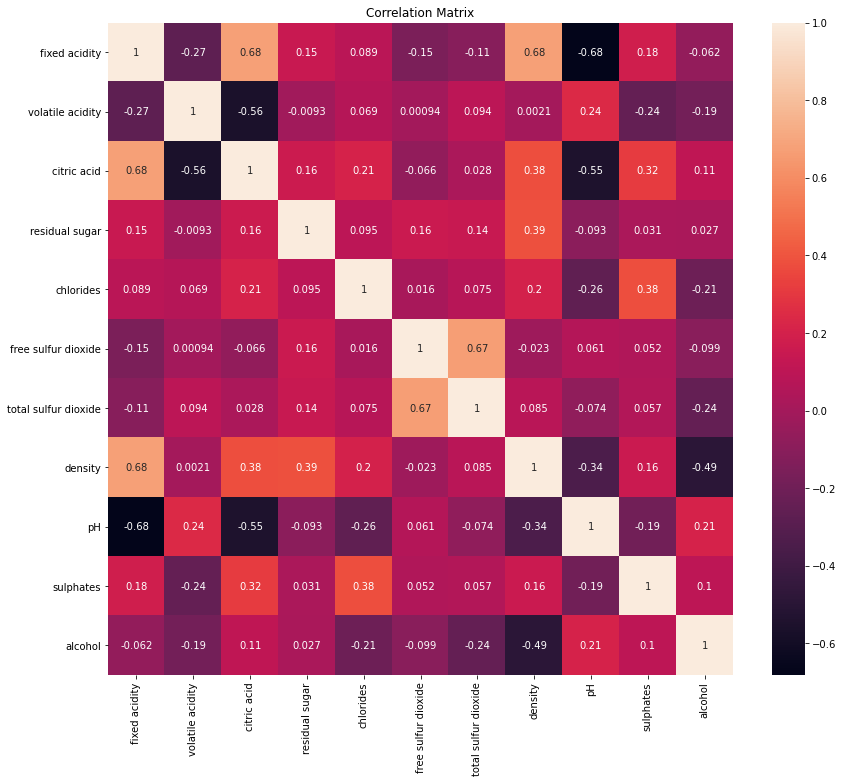

In [25]:
import seaborn as sns
plt.figure(figsize=(14,12))
plt.title("Correlation Matrix")
sns.heatmap(data = corr_matrix, annot=True)

Clearly,pH and fixed acidity shows a strong negative correlation.
Total slphur dioxide and free sulphur dioxide shows as strong positive correlation.

 **Kernel density estimation**

In [26]:
train_set_strat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.99640,3.21,0.61,9.3,0
1,5.9,0.440,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7,0
2,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,0
3,9.1,0.660,0.15,3.2,0.097,9.0,59.0,0.99976,3.28,0.54,9.6,0
4,7.9,0.720,0.17,2.6,0.096,20.0,38.0,0.99780,3.40,0.53,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1266,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,1
1267,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,0
1268,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,0
1269,7.0,0.620,0.08,1.8,0.076,8.0,24.0,0.99780,3.48,0.53,9.0,0


In [27]:
k_poor = train_set_strat.loc[train_set_strat.wine_quality == 0]
k_poor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.99640,3.21,0.61,9.3,0
1,5.9,0.440,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7,0
2,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,0
3,9.1,0.660,0.15,3.2,0.097,9.0,59.0,0.99976,3.28,0.54,9.6,0
4,7.9,0.720,0.17,2.6,0.096,20.0,38.0,0.99780,3.40,0.53,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1264,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,0
1267,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,0
1268,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,0
1269,7.0,0.620,0.08,1.8,0.076,8.0,24.0,0.99780,3.48,0.53,9.0,0


In [28]:
k_good = train_set_strat.loc[train_set_strat.wine_quality == 1]
k_good

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
11,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,1
16,8.7,0.410,0.41,6.20,0.078,25.0,42.0,0.99530,3.24,0.77,12.6,1
18,7.6,0.735,0.02,2.50,0.071,10.0,14.0,0.99538,3.51,0.71,11.7,1
26,11.9,0.430,0.66,3.10,0.109,10.0,23.0,1.00000,3.15,0.85,10.4,1
30,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1244,8.8,0.330,0.41,5.90,0.073,7.0,13.0,0.99658,3.30,0.62,12.1,1
1257,8.5,0.320,0.42,2.30,0.075,12.0,19.0,0.99434,3.14,0.71,11.8,1
1261,7.3,0.480,0.32,2.10,0.062,31.0,54.0,0.99728,3.30,0.65,10.0,1
1265,8.7,0.520,0.09,2.50,0.091,20.0,49.0,0.99760,3.34,0.86,10.6,1


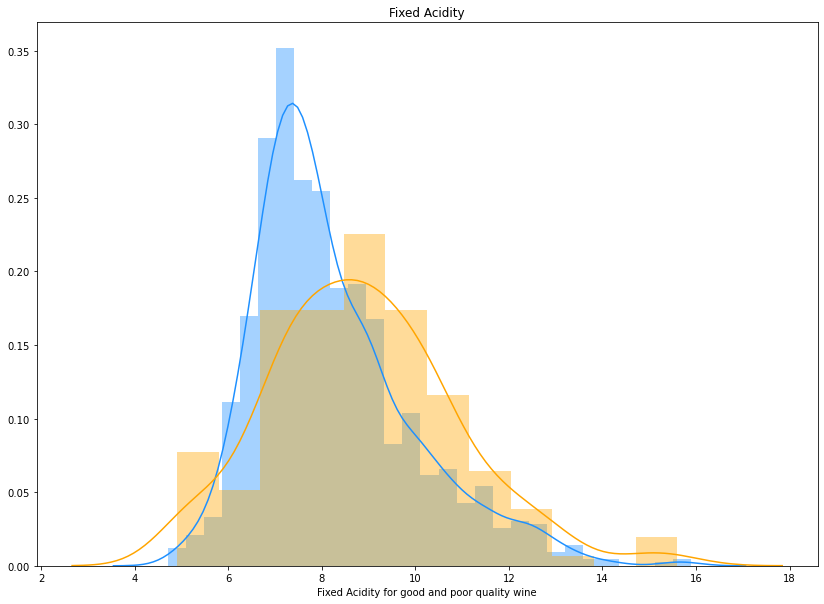

In [29]:
plt.figure(figsize=(14,10))
plt.title("Fixed Acidity")
sns.distplot(a=k_poor.loc[:, ['fixed acidity']], kde=True ,label='Poor Quality Wine', color="dodgerblue")
sns.distplot(a=k_good.loc[:, ['fixed acidity']], kde=True , label='Good Quality Wine', color="orange")
plt.xlabel('Fixed Acidity for good and poor quality wine')
plt.show()


Poor quality wine has a lot more fixe acidity unlike good quality wine.

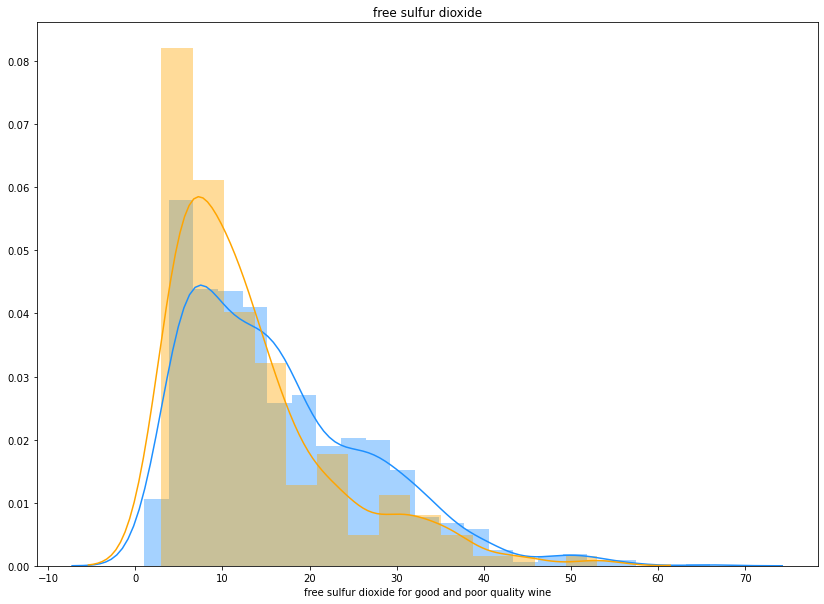

In [30]:
plt.figure(figsize=(14,10))
plt.title("free sulfur dioxide")
sns.distplot(a=k_poor.loc[:, ['free sulfur dioxide']], kde=True ,label='Poor Quality Wine', color="dodgerblue")
sns.distplot(a=k_good.loc[:, ['free sulfur dioxide']], kde=True , label='Good Quality Wine', color="orange")
plt.xlabel('free sulfur dioxide for good and poor quality wine')
plt.show()

Good quality wine is free of sulphur dioxide.

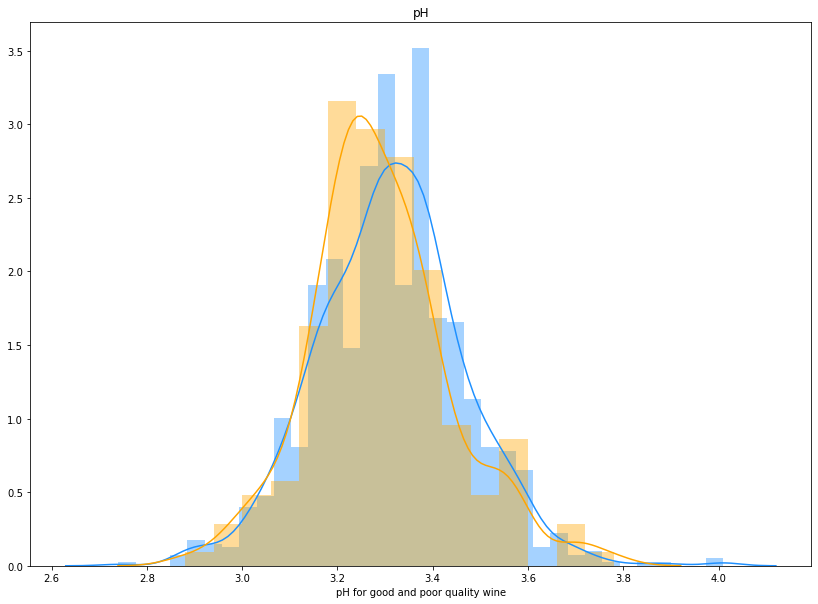

In [31]:
plt.figure(figsize=(14,10))
plt.title("pH")
sns.distplot(a=k_poor.loc[:, ['pH']], kde=True ,label='Poor Quality Wine', color="dodgerblue")
sns.distplot(a=k_good.loc[:, ['pH']], kde=True , label='Good Quality Wine', color="orange")
plt.xlabel('pH for good and poor quality wine')
plt.show()

Good quality wine has a slighty higher pH than poor quality wine.

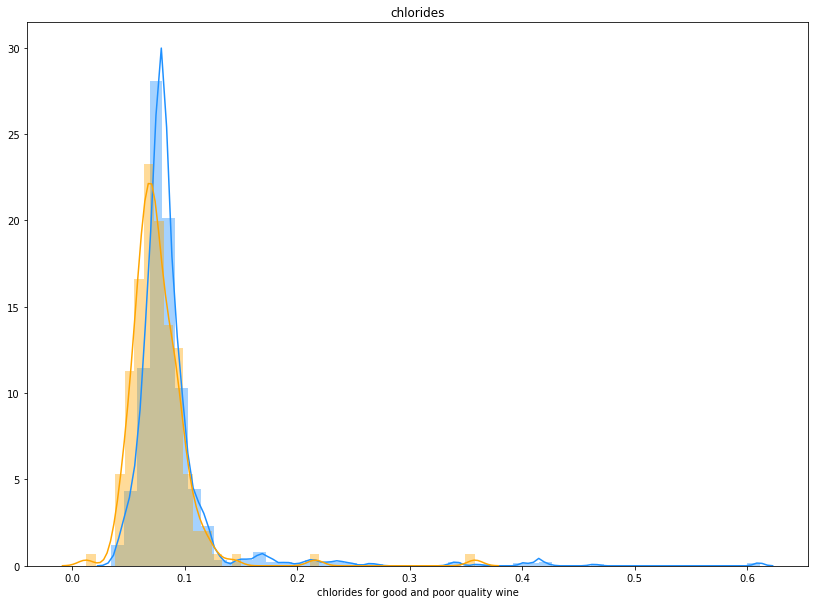

In [32]:
plt.figure(figsize=(14,10))
plt.title("chlorides")
sns.distplot(a=k_poor.loc[:, ['chlorides']], kde=True ,label='Poor Quality Wine', color="dodgerblue")
sns.distplot(a=k_good.loc[:, ['chlorides']], kde=True , label='Good Quality Wine', color="orange")
plt.xlabel('chlorides for good and poor quality wine')
plt.show()

Poor quality wine has higher chlorides unlike good quality wine.

BOXPLOT

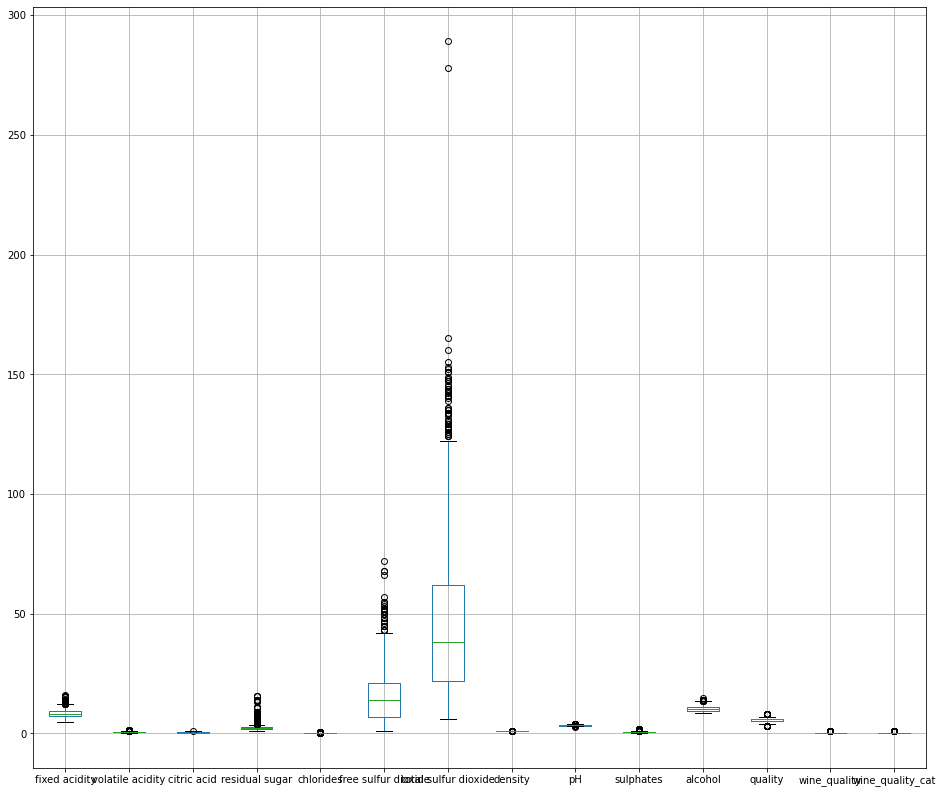

In [33]:
plt.figure(figsize=(16,14))
wine.boxplot()

We see outliers are in free sulphur dioxide and total sulphur dioxide is full of outliers.

These outliers have been tackled already. A new data set df and df_binary fom which outliers have been removed have been created from oiginal dataset - wine.

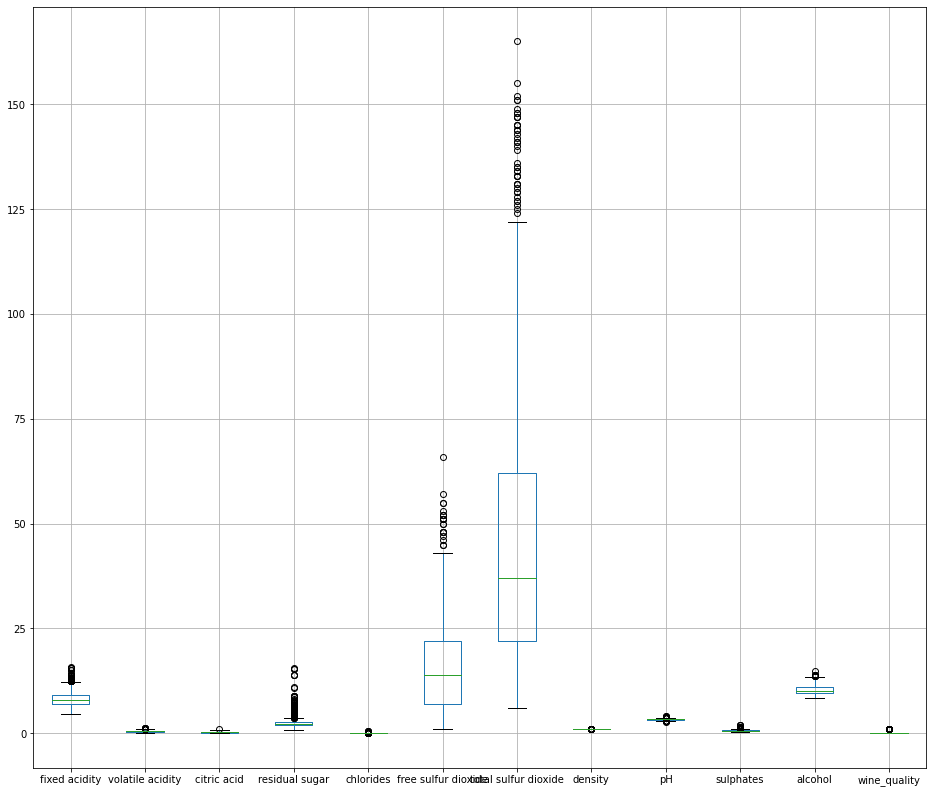

In [34]:
plt.figure(figsize=(16,14))
train_set_strat.boxplot()

The outliers have been reduced from total sulphur dioxide

BOXPLOT OF FIXED ACIDITY IN DETAIL

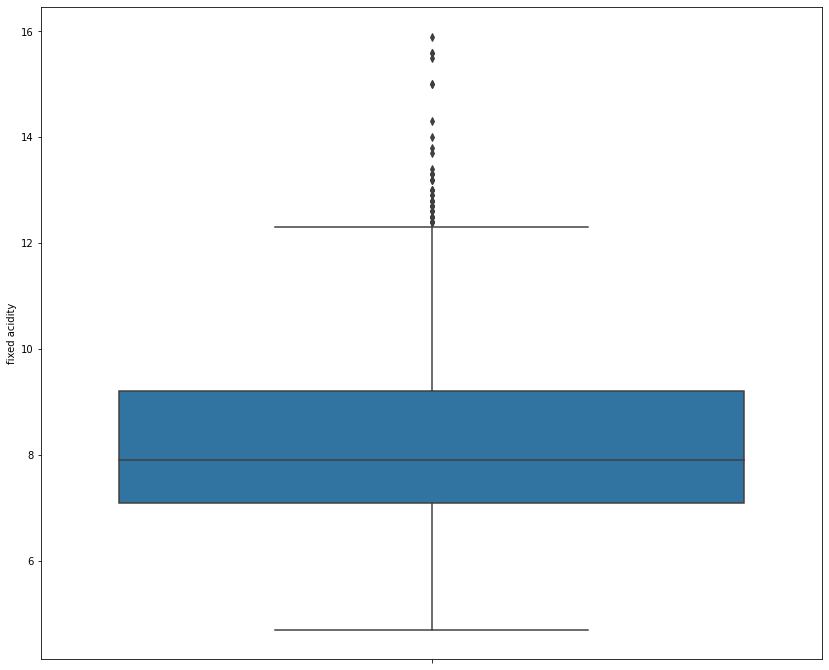

In [35]:
plt.figure(figsize=(14,12))

sns.boxplot(y="fixed acidity", data=train_set_strat)

Here is the fixed acidity box plot in depth.

BOXPLOT OF TOTAL SULFUR DIOXIDE IN DETAIL

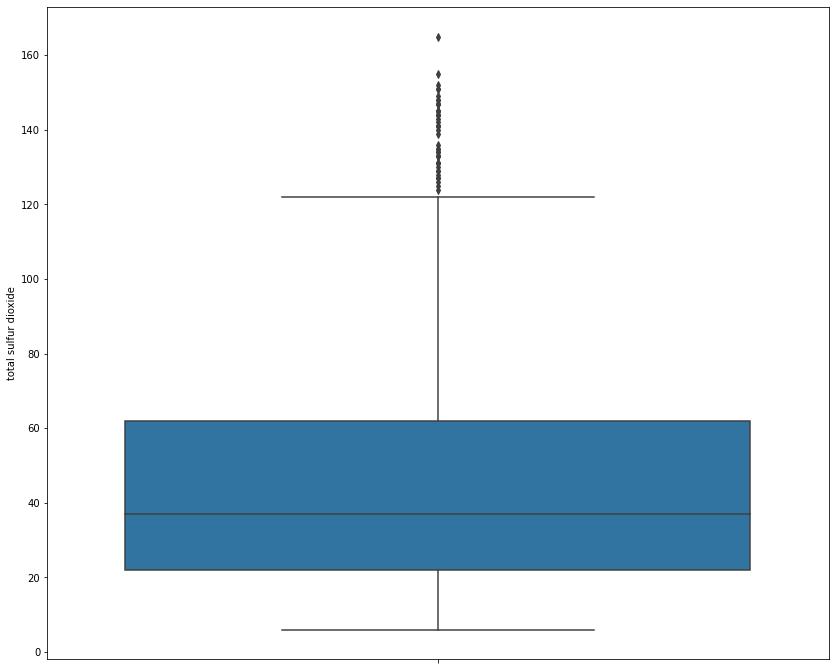

In [36]:
plt.figure(figsize=(14,12))

sns.boxplot(y="total sulfur dioxide", data=train_set_strat)

Here is the total sulfur dioxide box plot in depth.

**SCATTERPLOT**

Text(0.5, 1.0, 'Yards vs Week into the season')

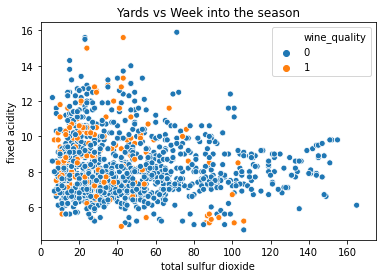

In [37]:
sns.scatterplot(x='total sulfur dioxide', y="fixed acidity", hue ='wine_quality', data=train_set_strat)
plt.xlim(0, 175)
plt.title("Yards vs Week into the season")

Poor quality wine has higher total sulphur dioxide and generally higher fixed acidity.

In [38]:
train_set_strat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.99640,3.21,0.61,9.3,0
1,5.9,0.440,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7,0
2,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,0
3,9.1,0.660,0.15,3.2,0.097,9.0,59.0,0.99976,3.28,0.54,9.6,0
4,7.9,0.720,0.17,2.6,0.096,20.0,38.0,0.99780,3.40,0.53,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1266,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,1
1267,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,0
1268,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,0
1269,7.0,0.620,0.08,1.8,0.076,8.0,24.0,0.99780,3.48,0.53,9.0,0


FEATURE ENGINEERING

In [39]:
# Note that drop() creates a copy and does not affect train_set_strat
X_train = train_set_strat.drop("wine_quality", axis=1)# remove target
y_train = train_set_strat["wine_quality"].values# only taget values

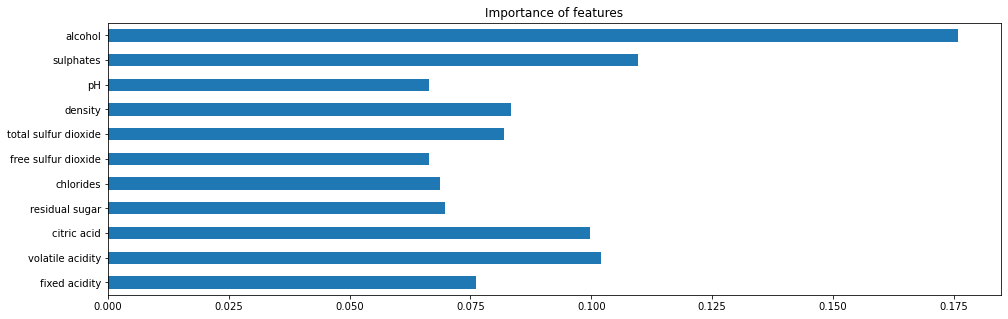

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

X = X_train
Y = y_train
bestfeatures2 = ExtraTreesClassifier()
fit2 = bestfeatures2.fit(X,Y) # model.fit(x,y)
model = pd.Series(fit2.feature_importances_, index=X.columns)
plt.figure(figsize = (16,5))
model.plot(kind='barh')
plt.title("Importance of features")
plt.show()

# IMPUTATION

There is no need for imputation

# ONE HOT ENCODING THE NUMBERICAL COLUMN 

There is no need for one hot encoding 

# STANDARDIZATION OF IMPUTED VARIABLES

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#call StandardScaler.
X_train_Std=scaler.fit_transform(X_train)#fit transform
X_train_Std

array([[-0.40680364,  0.89357328, -0.20244119, ..., -0.63924901,
        -0.27101354, -1.05451837],
       [-1.37399184, -0.49780233, -1.39245994, ...,  1.10234422,
         1.13709362,  1.20699613],
       [-0.23612337,  0.9219687 , -0.30592108, ..., -0.3812352 ,
        -0.85772486, -0.48913975],
       ...,
       [-0.97573788,  1.12073664, -0.35766103, ..., -0.12322139,
        -0.68171147, -1.14874815],
       [-0.74816419,  0.52443281, -0.97854038, ...,  1.10234422,
        -0.7403826 , -1.33720769],
       [-0.74816419, -0.83854738,  1.1427974 , ...,  0.52181314,
         0.66772457,  0.92430682]])

In [27]:
X_train_Std.mean()

-8.282084298426816e-15

In [28]:
X_train_Std.std()

1.0

The mean is 0 and the standard deviation is 1 for the new X_train dataset. So, the X_train dataset is now standardized. 

In [29]:
X_train_Std = pd.DataFrame(X_train_Std, columns=X_train.columns)#numpy(nmerical data) to pd 
#im is numerical dataframe,#X_train_im.columns -use those column names for the newly created data
#im numerical data frame and convert it to pandas 
X_train_Std

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.406804,0.893573,-0.202441,-0.156720,0.521691,0.386334,1.175382,-0.170105,-0.639249,-0.271014,-1.054518
1,-1.373992,-0.497802,-1.392460,-0.665695,-0.983945,-1.240546,-1.101113,-1.227544,1.102344,1.137094,1.206996
2,-0.236123,0.921969,-0.305921,-0.302141,-0.154754,1.630419,2.952919,-0.275849,-0.381235,-0.857725,-0.489140
3,0.446598,0.751596,-0.616361,0.497676,0.216199,-0.666353,0.395761,1.606391,-0.187725,-0.681711,-0.771829
4,-0.236123,1.092341,-0.512881,0.061412,0.194379,0.386334,-0.259121,0.570101,0.586317,-0.740383,-0.866059
...,...,...,...,...,...,...,...,...,...,...,...
1266,0.958639,-1.520037,1.401497,-0.447563,-0.089292,2.491708,0.863534,-1.169384,-2.122828,-0.153671,1.301226
1267,-1.886033,2.796066,-1.185500,-0.811116,-0.918483,2.396009,1.206567,-1.544775,2.843937,-1.033738,0.076239
1268,-0.975738,1.120737,-0.357661,3.842368,-0.307500,1.247623,1.019458,0.517230,-0.123221,-0.681711,-1.148748
1269,-0.748164,0.524433,-0.978540,-0.520273,-0.242038,-0.762052,-0.695709,0.570101,1.102344,-0.740383,-1.337208


# CONCATANATION of STANRARDIZED DATA AND ONE-HOT ENCODNG column

Not needed

In [30]:
X_train_new = X_train_Std.copy()

In [31]:
X_train_new.shape

(1271, 11)

In [32]:
y_train.shape

(1271,)

# UPSAMPLING

In [33]:
df_binary['wine_quality'].value_counts()

0    1372
1     217
Name: wine_quality, dtype: int64

In [34]:
df_minority =df_binary[df_binary['wine_quality']==1]
#df_major = df_majority['wine_quality']
#df_major.value_counts()

df_majority =df_binary[df_binary['wine_quality']==0]

In [35]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1372,    # to match majority class
                                 random_state=42) # reproducible results



Text(0, 0.5, 'Frequency')

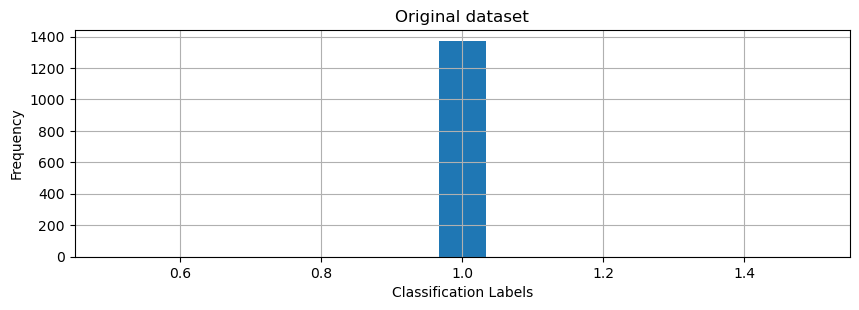

In [36]:
font = {'size'   : 10}
matplotlib.rc('font', **font)

fig = plt.subplots(figsize=(10, 3), dpi= 100, facecolor='w', edgecolor='k')


df_minority_upsampled['wine_quality'].hist(bins=15)
plt.title("Original dataset")
plt.xlabel("Classification Labels")
plt.ylabel("Frequency")


In [37]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['wine_quality'].value_counts()


1    1372
0    1372
Name: wine_quality, dtype: int64

The upsampled dataset has approximately 1372 is classified as good quality wine i.e. 12.6% of the total cases. The original dataset has apprximately 1380 is classified as poor quality wine ie 86.4% of the total cases.


In [38]:
df_upsampled


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,0
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,0
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,0
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,0
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
404,6.4,0.57,0.12,2.30,0.120,25.0,36.0,0.99519,3.47,0.71,11.3,1
812,11.1,0.31,0.53,2.20,0.060,3.0,10.0,0.99572,3.02,0.83,10.9,1
1174,7.9,0.30,0.68,8.30,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,1
1016,10.5,0.24,0.42,1.80,0.077,6.0,22.0,0.99760,3.21,1.05,10.8,1


In [39]:
X_up = df_upsampled.drop("wine_quality", axis=1)# remove target
y_up = df_upsampled["wine_quality"].values# only taget values

In [40]:
X_up

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...,...
404,6.4,0.57,0.12,2.30,0.120,25.0,36.0,0.99519,3.47,0.71,11.3
812,11.1,0.31,0.53,2.20,0.060,3.0,10.0,0.99572,3.02,0.83,10.9
1174,7.9,0.30,0.68,8.30,0.050,37.5,289.0,0.99316,3.01,0.51,12.3
1016,10.5,0.24,0.42,1.80,0.077,6.0,22.0,0.99760,3.21,1.05,10.8


In [41]:
y_up

array([0, 0, 0, ..., 1, 1, 1])

In [42]:
y_up.shape

(2744,)

**SPLIT DATA INTO TEST AND TRAINING DATA**

In [43]:
from sklearn.model_selection import train_test_split
# split again, and we should see the same split
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=0.2, random_state=42)

In [44]:
X_train_up

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
214,7.3,0.550,0.01,1.8,0.093,9.0,15.0,0.99514,3.35,0.58,11.0
933,9.6,0.380,0.31,2.5,0.096,16.0,49.0,0.99820,3.19,0.70,10.0
611,10.4,0.330,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2
1308,13.3,0.290,0.75,2.8,0.084,23.0,43.0,0.99860,3.04,0.68,11.4
45,10.4,0.240,0.46,1.8,0.075,6.0,21.0,0.99760,3.25,1.02,10.8
...,...,...,...,...,...,...,...,...,...,...,...
1521,7.8,0.320,0.44,2.7,0.104,8.0,17.0,0.99732,3.33,0.78,11.0
1273,7.0,0.500,0.14,1.8,0.078,10.0,23.0,0.99636,3.53,0.61,10.4
1315,7.0,0.220,0.30,1.8,0.065,16.0,20.0,0.99672,3.61,0.82,10.0
1506,6.4,0.865,0.03,3.2,0.071,27.0,58.0,0.99500,3.61,0.49,12.7


In [45]:
y_train_up

array([1, 1, 1, ..., 0, 0, 0])

In [46]:
y_train_up.shape

(2195,)

In [47]:
y_test_up.shape

(549,)

The split between test and train data is 549 and 2195 datasets that is a  20% split.

In [48]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2744 entries, 0 to 1045
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2744 non-null   float64
 1   volatile acidity      2744 non-null   float64
 2   citric acid           2744 non-null   float64
 3   residual sugar        2744 non-null   float64
 4   chlorides             2744 non-null   float64
 5   free sulfur dioxide   2744 non-null   float64
 6   total sulfur dioxide  2744 non-null   float64
 7   density               2744 non-null   float64
 8   pH                    2744 non-null   float64
 9   sulphates             2744 non-null   float64
 10  alcohol               2744 non-null   float64
 11  wine_quality          2744 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 278.7 KB


# IMPUTATION

There is no need for imputation.

# ONE HOT ENCODING THE NUMBERICAL COLUMN

There is no need for one hot encoding.

# STANDARDIZATION

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#call StandardScaler.
X_train_Std_up=scaler.fit_transform(X_train_up)#fit transform
X_train_Std_up

array([[-0.68169036,  0.43774834, -1.53403863, ...,  0.34052297,
        -0.70692571,  0.09994553],
       [ 0.57122714, -0.53654884, -0.04185369, ..., -0.70623123,
         0.04733456, -0.76711368],
       [ 1.00702453, -0.82310683,  1.54981025, ..., -0.24827627,
         0.29875465,  0.27335737],
       ...,
       [-0.84511439, -1.45353442, -0.09159319, ...,  2.04149855,
         0.80159483, -0.76711368],
       [-1.17196243,  2.2430637 , -1.43455964, ...,  2.04149855,
        -1.27262092,  1.57394618],
       [ 2.20546737, -0.36461404,  1.10215476, ..., -0.57538696,
         0.42446469,  0.36006329]])

In [50]:
X_train_Std_up.mean()

-6.4915561019391385e-15

In [51]:
X_train_Std_up.std()

1.0

The mean is 0 and the standard deviation is 1 for the new X_train dataset. So, the X_train_Std_up dataset is now standardized.

In [52]:
X_train_Std_up = pd.DataFrame(X_train_Std_up, columns=X_train_up.columns)#numpy(nmerical data) to pd 
#im is numerical dataframe,#X_train_im.columns -use those column names for the newly created data
#im numerical data frame and convert it to pandas 
X_train_Std_up

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.681690,0.437748,-1.534039,-0.580181,0.249796,-0.579446,-0.783713,-0.644557,0.340523,-0.706926,0.099946
1,0.571227,-0.536549,-0.041854,-0.096395,0.325189,0.087185,0.206057,0.854439,-0.706231,0.047335,-0.767114
2,1.007025,-0.823107,1.549810,0.110942,0.023619,-0.960377,-0.579937,1.638227,-0.248276,0.298755,0.273357
3,2.586790,-1.052353,2.146684,0.110942,0.023619,0.753815,0.031392,1.050386,-1.687563,-0.078375,0.446769
4,1.007025,-1.338911,0.704239,-0.580181,-0.202557,-0.865144,-0.609048,0.560518,-0.313698,2.058695,-0.073466
...,...,...,...,...,...,...,...,...,...,...,...
2190,-0.409317,-0.880418,0.604760,0.041829,0.526235,-0.674679,-0.725491,0.423355,0.209679,0.550175,0.099946
2191,-0.845114,0.151190,-0.887425,-0.580181,-0.127165,-0.484213,-0.550826,-0.046918,1.518121,-0.518361,-0.420290
2192,-0.845114,-1.453534,-0.091593,-0.580181,-0.453865,0.087185,-0.638158,0.129434,2.041499,0.801595,-0.767114
2193,-1.171962,2.243064,-1.434560,0.387391,-0.303080,1.134747,0.468055,-0.713138,2.041499,-1.272621,1.573946


# CONCATANATION of STANRARDIZED DATA AND ONE-HOT ENCODNG column

No need to concatenate

# VISUALIZATIONS

SCATTERPLOT

Text(0.5, 1.0, 'Yards vs Week into the season')

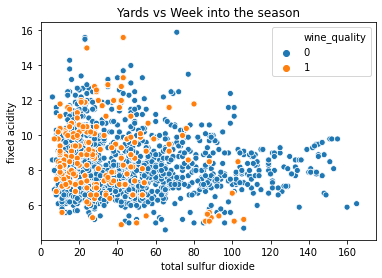

In [68]:
sns.scatterplot(x='total sulfur dioxide', y="fixed acidity", hue ='wine_quality', data=df_upsampled)
plt.xlim(0, 175)
plt.title("Yards vs Week into the season")

The scatterplot is a bit differnet from original data. 
Poor quality wine has higher total sulphur dioxide and generally higher fixed acidity.

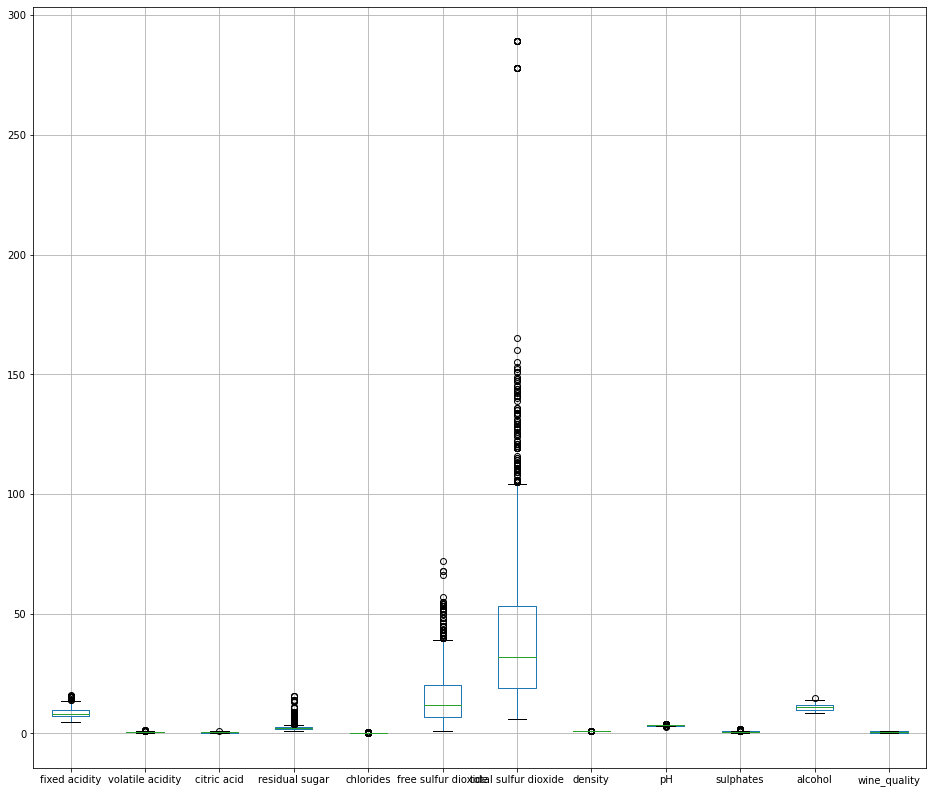

In [69]:
plt.figure(figsize=(16,14))
df_upsampled.boxplot()

We see outliers are in free sulphur dioxide and total sulphur dioxide is full of outliers.

These outliers have been tackled already.

However, we see that following upsampling the data looks a lot like the original data from where outliers were
not removed i.e. df dataset.

# Model Training and Evaluation

# KNN CLASSIFIER

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
model = KNeighborsClassifier()
import warnings
warnings.filterwarnings('ignore')

param_grid = [{
'n_neighbors': randint(low=1, high=20),'metric': ['euclidean', 'mahattan' , 'hamming']
               }]
knn = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 1000, scoring="accuracy", random_state =42)
knn.fit(X_train_new, y_train)
knn.best_params_


{'metric': 'euclidean', 'n_neighbors': 4}

In [71]:
cvreslt=knn.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.8355720240852247 {'metric': 'hamming', 'n_neighbors': 3}
0.8544449590859966 {'metric': 'hamming', 'n_neighbors': 2}
0.8607472595337349 {'metric': 'hamming', 'n_neighbors': 4}
0.8615253975605992 {'metric': 'hamming', 'n_neighbors': 18}
0.8646626524625599 {'metric': 'hamming', 'n_neighbors': 15}
0.8646626524625599 {'metric': 'hamming', 'n_neighbors': 15}
0.8670310328855952 {'metric': 'hamming', 'n_neighbors': 8}
0.8685965724872627 {'metric': 'euclidean', 'n_neighbors': 7}
nan {'metric': 'mahattan', 'n_neighbors': 19}
0.8654500540373631 {'metric': 'hamming', 'n_neighbors': 11}
nan {'metric': 'mahattan', 'n_neighbors': 6}
nan {'metric': 'mahattan', 'n_neighbors': 1}
nan {'metric': 'mahattan', 'n_neighbors': 12}
0.8355720240852247 {'metric': 'hamming', 'n_neighbors': 3}
0.8355720240852247 {'metric': 'hamming', 'n_neighbors': 3}
0.8434398641346302 {'metric': 'hamming', 'n_neighbors': 5}
0.8568102516597191 {'metric': 'hamming', 'n_neighbors': 7}
0.8568102516597191 {'metric': 'hamming', 'n_n

In [72]:
clf = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf.fit(X_train_new,y_train)

KNeighbors_accuracies=cross_val_score(clf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean( KNeighbors_accuracies)

0.8662405434614792

# KNN UPSAMPLED CLASSIFIER

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
model = KNeighborsClassifier()
#import warnings
#warnings.filterwarnings('ignore')

param_grid = [{
'n_neighbors': randint(low=1, high=20),'metric': ['euclidean', 'mahattan' , 'hamming']
               }]
knn_up = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 1000, scoring="accuracy", random_state =42)
knn_up.fit(X_train_Std_up, y_train_up)
knn_up.best_params_

{'metric': 'euclidean', 'n_neighbors': 1}

In [74]:
cvreslt=knn_up.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.7234624145785877 {'metric': 'hamming', 'n_neighbors': 17}
0.7248291571753985 {'metric': 'hamming', 'n_neighbors': 18}
0.7312072892938496 {'metric': 'hamming', 'n_neighbors': 15}
0.7312072892938496 {'metric': 'hamming', 'n_neighbors': 15}
0.7448747152619589 {'metric': 'hamming', 'n_neighbors': 11}
0.757630979498861 {'metric': 'hamming', 'n_neighbors': 9}
0.7708428246013668 {'metric': 'hamming', 'n_neighbors': 10}
0.7767653758542141 {'metric': 'hamming', 'n_neighbors': 8}
0.8405466970387243 {'metric': 'euclidean', 'n_neighbors': 7}
nan {'metric': 'mahattan', 'n_neighbors': 19}
0.7448747152619589 {'metric': 'hamming', 'n_neighbors': 11}
0.7767653758542141 {'metric': 'hamming', 'n_neighbors': 8}
0.7785876993166287 {'metric': 'hamming', 'n_neighbors': 7}
0.8118451025056947 {'metric': 'euclidean', 'n_neighbors': 19}
0.838268792710706 {'metric': 'hamming', 'n_neighbors': 4}
0.9111617312072893 {'metric': 'hamming', 'n_neighbors': 2}
nan {'metric': 'mahattan', 'n_neighbors': 6}
nan {'metric':

In [75]:
clf = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf.fit(X_train_Std_up, y_train_up)

KNeighbors_accuracies=cross_val_score(clf,X_train_Std_up, y_train_up, cv=5, scoring="accuracy")

np.mean( KNeighbors_accuracies)

0.9480637813211846

# SUPPORT VECTOR MACHINE-POLYNOMINAL KERNEL Fine-tune 'degree', 'coef0', 'C'.¶

In [213]:
from sklearn.svm import SVC
from scipy.stats import randint

np.random.seed(42)
model = SVC(random_state = 42) 

param_grid = [{
'kernel': ['poly'], 'C' : randint(low=0.01, high=100),'degree': randint(low=1, high=20),
    'coef0' : randint(low=1, high=5)
               }]

gs = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 30, scoring="accuracy",random_state = 42 , n_jobs=5)
gs.fit(X_train_new, y_train)
gs.best_params_

{'C': 8, 'coef0': 2, 'degree': 2, 'kernel': 'poly'}

In [308]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.8537683823529412 {'C': 49, 'coef0': 4, 'degree': 4, 'kernel': 'poly'}
0.8561243872549019 {'C': 73, 'coef0': 2, 'degree': 4, 'kernel': 'poly'}
0.8568995098039215 {'C': 74, 'coef0': 4, 'degree': 4, 'kernel': 'poly'}
0.8576746323529412 {'C': 91, 'coef0': 4, 'degree': 16, 'kernel': 'poly'}
0.8584528186274509 {'C': 75, 'coef0': 2, 'degree': 12, 'kernel': 'poly'}
0.8584589460784313 {'C': 71, 'coef0': 1, 'degree': 7, 'kernel': 'poly'}
0.8584712009803921 {'C': 53, 'coef0': 2, 'degree': 4, 'kernel': 'poly'}
0.8592340686274509 {'C': 13, 'coef0': 3, 'degree': 16, 'kernel': 'poly'}
0.859252450980392 {'C': 51, 'coef0': 1, 'degree': 15, 'kernel': 'poly'}
0.8600428921568627 {'C': 53, 'coef0': 1, 'degree': 18, 'kernel': 'poly'}
0.8608057598039215 {'C': 38, 'coef0': 2, 'degree': 4, 'kernel': 'poly'}
0.8608088235294117 {'C': 83, 'coef0': 4, 'degree': 15, 'kernel': 'poly'}
0.8616084558823529 {'C': 87, 'coef0': 4, 'degree': 6, 'kernel': 'poly'}
0.8623682598039215 {'C': 14, 'coef0': 2, 'degree': 15, 'ker

In [214]:
from sklearn.pipeline import Pipeline
clf = Pipeline([("svm_clf",SVC(kernel="poly", degree=2, coef0=2, C=8, random_state=42))])
clf.fit(X_train_new,y_train)

Accuracies=cross_val_score(clf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(Accuracies)

0.8885379118446848

# SUPPORT VECTOR MACHINE-POLYNOMINAL KERNEL Fine-tune 'degree', 'coef0', 'C' -UPSAMPLED¶

In [215]:
from sklearn.svm import SVC
from scipy.stats import randint

np.random.seed(42)
model = SVC(random_state = 42) 

param_grid = [{
'kernel': ['poly'], 'C' : randint(low=0.01, high=100),'degree': randint(low=1, high=20),
    'coef0' : randint(low=1, high=5)
               }]

gs = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 30, scoring="accuracy",random_state = 42 , n_jobs=5)
gs.fit(X_train_Std_up, y_train_up)
gs.best_params_

{'C': 1, 'coef0': 2, 'degree': 6, 'kernel': 'poly'}

In [311]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.8057256235827666 {'C': 1, 'coef0': 4, 'degree': 1, 'kernel': 'poly'}
0.841134817563389 {'C': 8, 'coef0': 2, 'degree': 2, 'kernel': 'poly'}
0.8443094207379922 {'C': 23, 'coef0': 3, 'degree': 2, 'kernel': 'poly'}
0.8461245104102249 {'C': 89, 'coef0': 4, 'degree': 2, 'kernel': 'poly'}
0.8987806637806639 {'C': 7, 'coef0': 3, 'degree': 3, 'kernel': 'poly'}
0.9164790764790764 {'C': 54, 'coef0': 4, 'degree': 3, 'kernel': 'poly'}
0.9287322201607916 {'C': 51, 'coef0': 1, 'degree': 15, 'kernel': 'poly'}
0.9314584621727479 {'C': 53, 'coef0': 1, 'degree': 18, 'kernel': 'poly'}
0.9332694289837148 {'C': 88, 'coef0': 1, 'degree': 10, 'kernel': 'poly'}
0.9346320346320347 {'C': 14, 'coef0': 2, 'degree': 15, 'kernel': 'poly'}
0.934635126777984 {'C': 1, 'coef0': 2, 'degree': 6, 'kernel': 'poly'}
0.9359936095650381 {'C': 71, 'coef0': 1, 'degree': 7, 'kernel': 'poly'}
0.9364481550195837 {'C': 75, 'coef0': 2, 'degree': 12, 'kernel': 'poly'}
0.9364491857349002 {'C': 77, 'coef0': 1, 'degree': 4, 'kernel': '

In [219]:
from sklearn.pipeline import Pipeline
clf = Pipeline([("svm_clf",SVC(kernel="poly", degree=4, coef0=2, C=53, random_state=42))])
clf.fit(X_train_Std_up, y_train_up)

Accuracies=cross_val_score(clf,X_train_Std_up, y_train_up, cv=5, scoring="accuracy")

np.mean(Accuracies)

0.9380410022779044

# DECISION TREE 

In [82]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
np.random.seed(42)
model = DecisionTreeClassifier(random_state =42)
#import warnings
#warnings.filterwarnings('ignore')

param_grid = [{
'max_depth': randint(low=1, high=100),'min_samples_leaf': randint(low=0.1, high=200), 
    'min_samples_split': randint(low=0.1, high=200)
               }]
gs = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 1000, scoring="accuracy",random_state=42)
gs.fit(X_train_new, y_train)
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 27}

In [83]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.8560104986876642 {'max_depth': 12, 'min_samples_leaf': 112, 'min_samples_split': 182}
0.85994750656168 {'max_depth': 54, 'min_samples_leaf': 105, 'min_samples_split': 3}
0.85994750656168 {'max_depth': 92, 'min_samples_leaf': 110, 'min_samples_split': 187}
0.8630971128608925 {'max_depth': 11, 'min_samples_leaf': 80, 'min_samples_split': 135}
0.8630971128608925 {'max_depth': 4, 'min_samples_leaf': 88, 'min_samples_split': 59}
0.8630971128608925 {'max_depth': 44, 'min_samples_leaf': 83, 'min_samples_split': 29}
0.8630971128608925 {'max_depth': 52, 'min_samples_leaf': 92, 'min_samples_split': 14}
0.8630971128608925 {'max_depth': 59, 'min_samples_leaf': 85, 'min_samples_split': 27}
0.8630971128608925 {'max_depth': 85, 'min_samples_leaf': 81, 'min_samples_split': 110}
0.8630971128608925 {'max_depth': 86, 'min_samples_leaf': 34, 'min_samples_split': 192}
0.8630971128608925 {'max_depth': 90, 'min_samples_leaf': 43, 'min_samples_split': 161}
0.8630971128608925 {'max_depth': 99, 'min_samples_l

In [85]:
clf = DecisionTreeClassifier(max_depth=11, min_samples_leaf=39, min_samples_split=10, random_state = 42)
clf.fit(X_train_new,y_train)

Decision_tree_accuracies=cross_val_score(clf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(Decision_tree_accuracies)

0.8851165663115641

# DECISION TREE - UPSAMPLED

In [86]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
np.random.seed(42)
model = DecisionTreeClassifier(random_state =42)
#import warnings
#warnings.filterwarnings('ignore')

param_grid = [{
'max_depth': randint(low=1, high=100),'min_samples_leaf': randint(low=0.1, high=200), 
    'min_samples_split': randint(low=0.1, high=200)
               }]
gs = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 1000, scoring="accuracy",random_state=42)
gs.fit(X_train_Std_up, y_train_up)
gs.best_params_

{'max_depth': 97, 'min_samples_leaf': 3, 'min_samples_split': 3}

In [87]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.7462414578587699 {'max_depth': 2, 'min_samples_leaf': 127, 'min_samples_split': 159}
0.7553530751708429 {'max_depth': 1, 'min_samples_leaf': 135, 'min_samples_split': 62}
0.7644646924829156 {'max_depth': 27, 'min_samples_leaf': 189, 'min_samples_split': 120}
0.7644646924829156 {'max_depth': 42, 'min_samples_leaf': 187, 'min_samples_split': 14}
0.7644646924829156 {'max_depth': 54, 'min_samples_leaf': 190, 'min_samples_split': 145}
0.7644646924829156 {'max_depth': 62, 'min_samples_leaf': 184, 'min_samples_split': 133}
0.7644646924829156 {'max_depth': 62, 'min_samples_leaf': 189, 'min_samples_split': 174}
0.7644646924829156 {'max_depth': 64, 'min_samples_leaf': 187, 'min_samples_split': 20}
0.7644646924829156 {'max_depth': 72, 'min_samples_leaf': 188, 'min_samples_split': 20}
0.7644646924829156 {'max_depth': 72, 'min_samples_leaf': 189, 'min_samples_split': 39}
0.7644646924829156 {'max_depth': 74, 'min_samples_leaf': 189, 'min_samples_split': 13}
0.7644646924829156 {'max_depth': 89, 'mi

In [88]:
clf = DecisionTreeClassifier(max_depth=97, min_samples_leaf=3, min_samples_split=3, random_state = 42)
clf.fit(X_train_Std_up, y_train_up)

Decision_tree_accuracies=cross_val_score(clf,X_train_Std_up, y_train_up, cv=5, scoring="accuracy")

np.mean(Decision_tree_accuracies)

0.9266514806378131

# RANDOM FOREST

In [89]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
np.random.seed(42)
model_rnd = RandomForestClassifier(random_state =42)


param_grid = [{
'max_depth': randint(low=1, high=100),'n_estimators': randint(low=0.1, high=100), 'min_samples_split': randint(low=0.1, high=100),'bootstrap': [True, False]
               }]
gs = RandomizedSearchCV(model_rnd,param_grid,cv=5, n_iter = 500, scoring="accuracy", random_state =42)
gs.fit(X_train_new, y_train)
gs.best_params_

{'bootstrap': True,
 'max_depth': 96,
 'min_samples_split': 3,
 'n_estimators': 93}

In [90]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.85994750656168 {'bootstrap': True, 'max_depth': 22, 'min_samples_split': 52, 'n_estimators': 1}
0.8638845144356957 {'bootstrap': False, 'max_depth': 12, 'min_samples_split': 38, 'n_estimators': 1}
0.8638845144356957 {'bootstrap': False, 'max_depth': 30, 'min_samples_split': 37, 'n_estimators': 1}
0.874892697236375 {'bootstrap': True, 'max_depth': 47, 'min_samples_split': 77, 'n_estimators': 2}
0.8764613246873554 {'bootstrap': False, 'max_depth': 44, 'min_samples_split': 83, 'n_estimators': 29}
0.8772487262621584 {'bootstrap': True, 'max_depth': 59, 'min_samples_split': 85, 'n_estimators': 27}
0.8772487262621584 {'bootstrap': True, 'max_depth': 88, 'min_samples_split': 99, 'n_estimators': 23}
0.8780423035355875 {'bootstrap': False, 'max_depth': 92, 'min_samples_split': 59, 'n_estimators': 79}
0.8788204415624519 {'bootstrap': False, 'max_depth': 89, 'min_samples_split': 59, 'n_estimators': 13}
0.8788235294117648 {'bootstrap': False, 'max_depth': 52, 'min_samples_split': 61, 'n_estimato

In [91]:
rf = RandomForestClassifier(bootstrap = True, max_depth=17, min_samples_split=9 , n_estimators = 64, random_state = 42)
rf.fit(X_train_new,y_train)

Random_forest_accuracies=cross_val_score(rf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(Random_forest_accuracies)

0.8914281303072411

# RANDOM FOREST - UPSAMPLED

In [92]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
np.random.seed(42)
model_rnd = RandomForestClassifier(random_state =42)


param_grid = [{
'max_depth': randint(low=1, high=100),'n_estimators': randint(low=0.1, high=100), 'min_samples_split': randint(low=0.1, high=100),'bootstrap': [True, False]
               }]
gs = RandomizedSearchCV(model_rnd,param_grid,cv=5, n_iter = 500, scoring="accuracy", random_state =42)
gs.fit(X_train_Std_up, y_train_up)
gs.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_split': 4,
 'n_estimators': 32}

In [93]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.8095671981776766 {'bootstrap': True, 'max_depth': 22, 'min_samples_split': 52, 'n_estimators': 1}
0.8154897494305239 {'bootstrap': True, 'max_depth': 3, 'min_samples_split': 50, 'n_estimators': 6}
0.8236902050113895 {'bootstrap': True, 'max_depth': 3, 'min_samples_split': 69, 'n_estimators': 71}
0.8359908883826879 {'bootstrap': True, 'max_depth': 47, 'min_samples_split': 77, 'n_estimators': 2}
0.8400911161731207 {'bootstrap': True, 'max_depth': 5, 'min_samples_split': 89, 'n_estimators': 13}
0.847380410022779 {'bootstrap': False, 'max_depth': 4, 'min_samples_split': 53, 'n_estimators': 92}
0.852391799544419 {'bootstrap': True, 'max_depth': 88, 'min_samples_split': 99, 'n_estimators': 23}
0.8528473804100228 {'bootstrap': True, 'max_depth': 52, 'min_samples_split': 92, 'n_estimators': 14}
0.8578587699316629 {'bootstrap': True, 'max_depth': 63, 'min_samples_split': 95, 'n_estimators': 51}
0.8633257403189066 {'bootstrap': True, 'max_depth': 59, 'min_samples_split': 85, 'n_estimators': 27

In [95]:
rf = RandomForestClassifier(bootstrap = False, max_depth=49, min_samples_split=2 , n_estimators = 44, random_state = 42)
rf.fit(X_train_Std_up, y_train_up)

Random_forest_accuracies=cross_val_score(rf,X_train_Std_up, y_train_up, cv=5, scoring="accuracy")

np.mean(Random_forest_accuracies)

0.9735763097949887

# XGBOOST

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

import xgboost

np.random.seed(42)
model = xgboost.XGBClassifier(random_state=42)

param_grid = [{
'learning_rate': randint(low=0.1, high=100),'n_estimators': randint(low=0.1, high=500), 'max_depth' : randint(low=0.1, high=500) 
               }]
gs = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 1000, scoring="accuracy",random_state=42)
gs.fit(X_train_new, y_train)
gs.best_params_

{'learning_rate': 1, 'max_depth': 129, 'n_estimators': 219}

In [57]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.13689979928979465 {'learning_rate': 46, 'max_depth': 0, 'n_estimators': 89}
0.2557140651536205 {'learning_rate': 45, 'max_depth': 264, 'n_estimators': 2}
0.263588080901652 {'learning_rate': 93, 'max_depth': 176, 'n_estimators': 2}
0.375482476455149 {'learning_rate': 68, 'max_depth': 33, 'n_estimators': 261}
0.40922340589779216 {'learning_rate': 7, 'max_depth': 467, 'n_estimators': 2}
0.4243013740929443 {'learning_rate': 76, 'max_depth': 219, 'n_estimators': 239}
0.42666357881735373 {'learning_rate': 43, 'max_depth': 380, 'n_estimators': 57}
0.4266635788173538 {'learning_rate': 96, 'max_depth': 438, 'n_estimators': 241}
0.42823838196696 {'learning_rate': 58, 'max_depth': 130, 'n_estimators': 411}
0.42823838196696 {'learning_rate': 75, 'max_depth': 164, 'n_estimators': 304}
0.42845453141886686 {'learning_rate': 48, 'max_depth': 77, 'n_estimators': 217}
0.42845453141886686 {'learning_rate': 58, 'max_depth': 83, 'n_estimators': 261}
0.46039524471205817 {'learning_rate': 48, 'max_depth': 

In [58]:
clf = xgboost.XGBClassifier(learning_rate=1, n_estimators=219, max_depth = 129, random_state = 42)
clf.fit(X_train_new,y_train)

xbg_accuracies=cross_val_score(clf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(xbg_accuracies)

0.8945715609078277

# XGBOOST - UPSAMPLED

In [75]:
import xgboost

np.random.seed(42)
model = xgboost.XGBClassifier(random_state=42)

param_grid = [{
'learning_rate': randint(low=0.1, high=100),'n_estimators': randint(low=0.1, high=500), 'max_depth' : randint(low=0.1, high=130) 
               }]
gs = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 1000, scoring="accuracy",random_state=42)
gs.fit(X_train_Std_up, y_train_up)
gs.best_params_

{'learning_rate': 1, 'max_depth': 59, 'n_estimators': 150}

In [76]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.41275626423690215 {'learning_rate': 93, 'max_depth': 48, 'n_estimators': 2}
0.44738041002277906 {'learning_rate': 55, 'max_depth': 93, 'n_estimators': 106}
0.44874715261959003 {'learning_rate': 88, 'max_depth': 85, 'n_estimators': 314}
0.45876993166287017 {'learning_rate': 43, 'max_depth': 7, 'n_estimators': 430}
0.46059225512528473 {'learning_rate': 94, 'max_depth': 71, 'n_estimators': 38}
0.46833712984054665 {'learning_rate': 98, 'max_depth': 48, 'n_estimators': 98}
0.46833712984054665 {'learning_rate': 98, 'max_depth': 88, 'n_estimators': 98}
0.47243735763097955 {'learning_rate': 87, 'max_depth': 36, 'n_estimators': 98}
0.4742596810933941 {'learning_rate': 50, 'max_depth': 42, 'n_estimators': 100}
0.4742596810933941 {'learning_rate': 81, 'max_depth': 98, 'n_estimators': 232}
0.4874715261958998 {'learning_rate': 39, 'max_depth': 89, 'n_estimators': 182}
0.48838268792710704 {'learning_rate': 22, 'max_depth': 15, 'n_estimators': 56}
0.48929384965831435 {'learning_rate': 81, 'max_dept

In [74]:
clf = xgboost.XGBClassifier(learning_rate=1, n_estimators=248, max_depth = 474, random_state = 42)
clf.fit(X_train_Std_up, y_train_up)

xbg_accuracies=cross_val_score(clf,X_train_Std_up, y_train_up, cv=5, scoring="accuracy")

np.mean(xbg_accuracies)

0.9599088838268793

# ADAPTIVE BOOSTING WITH RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

r_forest = RandomForestClassifier(bootstrap = False, max_depth=49, min_samples_split=2 , n_estimators = 44, random_state = 42)


ada_tree = AdaBoostClassifier(r_forest,random_state=42)
params = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
          'algorithm':['SAMME', 'SAMME.R'],
          'n_estimators':list(range(50,150,25))}
ada_tree_search_cv = GridSearchCV(ada_tree, params, cv=5,scoring="accuracy") 
ada_tree_search_cv.fit(X_train_new,y_train)

params_ada_tree = ada_tree_search_cv.best_params_
params_ada_tree

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}

In [72]:
cvreslt=ada_tree_search_cv.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.8945684730585148 {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}
0.8945684730585148 {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 125}
0.8945684730585148 {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
0.8945684730585148 {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 75}
0.8945684730585148 {'algorithm': 'SAMME', 'learning_rate': 0.2, 'n_estimators': 100}
0.8945684730585148 {'algorithm': 'SAMME', 'learning_rate': 0.2, 'n_estimators': 125}
0.8945684730585148 {'algorithm': 'SAMME', 'learning_rate': 0.2, 'n_estimators': 50}
0.8945684730585148 {'algorithm': 'SAMME', 'learning_rate': 0.2, 'n_estimators': 75}
0.8945684730585148 {'algorithm': 'SAMME', 'learning_rate': 0.3, 'n_estimators': 100}
0.8945684730585148 {'algorithm': 'SAMME', 'learning_rate': 0.3, 'n_estimators': 125}
0.8945684730585148 {'algorithm': 'SAMME', 'learning_rate': 0.3, 'n_estimators': 50}
0.8945684730585148 {'algorithm': 'SAMME', 'learning_rate': 0.3, 'n_est

In [73]:
clf = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)
clf.fit(X_train_new,y_train)

Accuracies=cross_val_score(clf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(Accuracies)

0.9016581750810561

# ADAPTIVE BOOSTING WITH RANDOM FOREST - UPSAMPLED

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
import xgboost


r_forest = RandomForestClassifier(bootstrap = False, max_depth=49, min_samples_split=2 , n_estimators = 44, random_state = 42)


ada_tree = AdaBoostClassifier(r_forest,random_state=42)
params = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
          'algorithm':['SAMME', 'SAMME.R'],
          'n_estimators':list(range(50,150,25))}
ada_tree_search_cv = GridSearchCV(ada_tree, params, cv=5,scoring="accuracy") 
ada_tree_search_cv.fit(X_train_Std_up, y_train_up)

params_ada_tree = ada_tree_search_cv.best_params_
params_ada_tree

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}

In [78]:
cvreslt=ada_tree_search_cv.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.9758542141230068 {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}
0.9758542141230068 {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 125}
0.9758542141230068 {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
0.9758542141230068 {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 75}
0.9758542141230068 {'algorithm': 'SAMME', 'learning_rate': 0.2, 'n_estimators': 100}
0.9758542141230068 {'algorithm': 'SAMME', 'learning_rate': 0.2, 'n_estimators': 125}
0.9758542141230068 {'algorithm': 'SAMME', 'learning_rate': 0.2, 'n_estimators': 50}
0.9758542141230068 {'algorithm': 'SAMME', 'learning_rate': 0.2, 'n_estimators': 75}
0.9758542141230068 {'algorithm': 'SAMME', 'learning_rate': 0.3, 'n_estimators': 100}
0.9758542141230068 {'algorithm': 'SAMME', 'learning_rate': 0.3, 'n_estimators': 125}
0.9758542141230068 {'algorithm': 'SAMME', 'learning_rate': 0.3, 'n_estimators': 50}
0.9758542141230068 {'algorithm': 'SAMME', 'learning_rate': 0.3, 'n_est

In [79]:
clf = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)
clf.fit(X_train_Std_up, y_train_up)

Accuracies=cross_val_score(clf,X_train_Std_up, y_train_up, cv=5, scoring="accuracy")

np.mean(Accuracies)

0.9612756264236901

# RANDOM FOREST IN BAGGING

In [82]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import BaggingClassifier

np.random.seed(42)
model = BaggingClassifier(RandomForestClassifier(random_state=42), random_state=42)

param_grid = [{
'max_samples': randint(low=0.1, high=30),'n_estimators': randint(low=0.1, high=30),'bootstrap': [True, False] 
               }]
gs = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 60, scoring="accuracy", random_state =42)
gs.fit(X_train_new, y_train)
gs.best_params_

{'bootstrap': False, 'max_samples': 26, 'n_estimators': 2}

In [81]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.8591631928361897 {'bootstrap': False, 'max_samples': 20, 'n_estimators': 1}
0.860737995985796 {'bootstrap': True, 'max_samples': 13, 'n_estimators': 2}
0.861531573259225 {'bootstrap': True, 'max_samples': 20, 'n_estimators': 6}
0.861531573259225 {'bootstrap': True, 'max_samples': 24, 'n_estimators': 6}
0.8623127991354023 {'bootstrap': False, 'max_samples': 23, 'n_estimators': 4}
0.8623127991354023 {'bootstrap': False, 'max_samples': 27, 'n_estimators': 20}
0.8623158869847153 {'bootstrap': False, 'max_samples': 25, 'n_estimators': 8}
0.8623158869847153 {'bootstrap': True, 'max_samples': 23, 'n_estimators': 25}
0.8631002007102054 {'bootstrap': False, 'max_samples': 1, 'n_estimators': 29}
0.8631002007102054 {'bootstrap': False, 'max_samples': 1, 'n_estimators': 9}
0.8631002007102054 {'bootstrap': False, 'max_samples': 12, 'n_estimators': 8}
0.8631002007102054 {'bootstrap': False, 'max_samples': 13, 'n_estimators': 22}
0.8631002007102054 {'bootstrap': False, 'max_samples': 15, 'n_estimat

In [83]:
clf = BaggingClassifier(RandomForestClassifier(random_state=42),n_estimators=2, random_state = 42, bootstrap = False, max_samples =26)
clf.fit(X_train_new,y_train)

Accuracies=cross_val_score(clf,X_train_new,y_train, cv=5, scoring="accuracy")

np.mean(Accuracies)

0.8701775513354949

# RANDOM FOREST IN BAGGING -  UPSAMPLED

In [92]:
from sklearn.ensemble import BaggingClassifier

np.random.seed(42)
model = BaggingClassifier(RandomForestClassifier(random_state=42), random_state=42)

param_grid = [{
'max_samples': randint(low=0.1, high=30),'n_estimators': randint(low=0.1, high=200),'bootstrap': [True, False] 
               }]
gs = RandomizedSearchCV(model,param_grid,cv=5, n_iter = 60, scoring="accuracy", random_state =42)
gs.fit(X_train_Std_up, y_train_up)
gs.best_params_

{'bootstrap': True, 'max_samples': 26, 'n_estimators': 136}

In [94]:
cvreslt=gs.cv_results_

cvreslt_params=[str(i) for i in cvreslt["params"]]

for accuracy, params in sorted(zip(cvreslt["mean_test_score"], cvreslt_params)):
    print(np.mean(accuracy), params)

0.49794988610478363 {'bootstrap': False, 'max_samples': 1, 'n_estimators': 32}
0.5006833712984056 {'bootstrap': False, 'max_samples': 1, 'n_estimators': 191}
0.5034168564920274 {'bootstrap': False, 'max_samples': 1, 'n_estimators': 133}
0.6136674259681094 {'bootstrap': True, 'max_samples': 2, 'n_estimators': 100}
0.6195899772209568 {'bootstrap': False, 'max_samples': 2, 'n_estimators': 162}
0.6874715261958999 {'bootstrap': False, 'max_samples': 3, 'n_estimators': 88}
0.7567198177676537 {'bootstrap': False, 'max_samples': 9, 'n_estimators': 3}
0.7858769931662869 {'bootstrap': False, 'max_samples': 13, 'n_estimators': 8}
0.7872437357630979 {'bootstrap': False, 'max_samples': 6, 'n_estimators': 171}
0.7876993166287016 {'bootstrap': False, 'max_samples': 6, 'n_estimators': 71}
0.7908883826879272 {'bootstrap': True, 'max_samples': 10, 'n_estimators': 71}
0.7917995444191344 {'bootstrap': False, 'max_samples': 6, 'n_estimators': 40}
0.7927107061503417 {'bootstrap': True, 'max_samples': 7, 'n_

In [89]:
clf = BaggingClassifier(RandomForestClassifier(random_state=42),n_estimators=22, random_state = 42, bootstrap = False, max_samples =22)
clf.fit(X_train_Std_up, y_train_up)

Accuracies=cross_val_score(clf,X_train_Std_up, y_train_up, cv=5, scoring="accuracy")

np.mean(Accuracies)

0.8127562642369022

**FINDING THE TOP THREE CLASSIFIERS FOR HARD AND SOFT VOTING**

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svm = Pipeline([("svm_clf",SVC(kernel="poly", degree=2, coef0=2, C=8, random_state=42))])
dt = DecisionTreeClassifier(max_depth=11, min_samples_leaf=39, min_samples_split=10, random_state = 42)
rf = RandomForestClassifier(bootstrap = True, max_depth=17, min_samples_split=9 , n_estimators = 64, random_state = 42)
xbg = xgboost.XGBClassifier(learning_rate=1, n_estimators=219, max_depth = 129, random_state = 42)
adaptive_boosting = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)
bagging_adaptive_boosting = BaggingClassifier(RandomForestClassifier(random_state=42),n_estimators=2, random_state = 42, bootstrap = False, max_samples =26)


clf=['K_neighbour :', 'Poly_SVC :', 
     'Decision_tree :','Random_Forest :', 'Xbg :', 'Adaptive_boosting :',
     'Bagging_random_forest :' ]
i=0
pre_acc=[]
for clfier in (knn,svm, dt,rf,xbg,
               adaptive_boosting,bagging_adaptive_boosting):
    clfier.fit(X_train_new, y_train)
    #y_pred = clfier.predict(X_train_new)
    #acc=accuracy_score(y_train, y_pred)
    acc  = cross_val_score(clfier,X_train_new,y_train, cv=5, scoring="accuracy")
    
    mean_acc =np.mean(acc)
    pre_acc.append(mean_acc)
    #print(clf[i], mean_acc)
    #pre_acc.append(acc)
    print(clf[i], mean_acc)
    i+=1

K_neighbour : 0.8662405434614792
Poly_SVC : 0.8748988729350009
Decision_tree : 0.8851165663115641
Random_Forest : 0.8914281303072411
Xbg : 0.8945715609078277
Adaptive_boosting : 0.9016581750810561
Bagging_random_forest : 0.8701775513354949


Here we see that Adaptive_boosting, Random_Forest, and XBG

**HARD VOTING**

In [95]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(bootstrap = True, max_depth=17, min_samples_split=9 , n_estimators = 64, random_state = 42)
xbg = xgboost.XGBClassifier(learning_rate=1, n_estimators=219, max_depth = 129, random_state = 42)
adaptive_boosting = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)

hard_voting = VotingClassifier(estimators=[('random_forest', rf ), ('xbg', xbg), 
                                           ('adaptive_boosting', adaptive_boosting)],voting='hard')
hard_voting.fit(X_train_new, y_train)

clf=['Random_forest:', 'Xbg:', 'Adaptive_boosting:', 'Hard Voting:']
i=0
for clfier in (rf,xbg,adaptive_boosting, hard_voting):
    clfier.fit(X_train_new, y_train)
    Accuracies=cross_val_score(clfier,X_train_new,y_train, cv=5, scoring="accuracy")
    print(clf[i], np.mean(Accuracies))
    
    i+=1

Random_forest: 0.8914281303072411
Xbg: 0.8945715609078277
Adaptive_boosting: 0.9016581750810561
Hard Voting: 0.9024424888065463


**SOFT VOTING**

In [97]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(bootstrap = True, max_depth=17, min_samples_split=9 , n_estimators = 64, random_state = 42)
xbg = xgboost.XGBClassifier(learning_rate=1, n_estimators=219, max_depth = 129, random_state = 42)
adaptive_boosting = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)

soft_voting = VotingClassifier(estimators=[('random_forest', rf ), ('xbg', xbg), 
                                           ('adaptive_boosting', adaptive_boosting)],voting='soft')
soft_voting.fit(X_train_new, y_train)

clf=['Random_forest:', 'Xbg:', 'Adaptive_boosting:', 'Soft Voting:']
i=0
for clfier in (rf,xbg,adaptive_boosting, soft_voting):
    clfier.fit(X_train_new, y_train)
    Accuracies=cross_val_score(clfier,X_train_new,y_train, cv=5, scoring="accuracy")
    print(clf[i], np.mean(Accuracies))
    
    i+=1

Random_forest: 0.8914281303072411
Xbg: 0.8945715609078277
Adaptive_boosting: 0.9016581750810561
Soft Voting: 0.8985023930832176


Hard Voting performs better than soft voting.

**MAKING PLOT TOP CLASSIFIERS**

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svm = Pipeline([("svm_clf",SVC(kernel="poly", degree=2, coef0=2, C=8, random_state=42))])
dt = DecisionTreeClassifier(max_depth=11, min_samples_leaf=39, min_samples_split=10, random_state = 42)
rf = RandomForestClassifier(bootstrap = True, max_depth=17, min_samples_split=9 , n_estimators = 64, random_state = 42)
xbg = xgboost.XGBClassifier(learning_rate=1, n_estimators=219, max_depth = 129, random_state = 42)
adaptive_boosting = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)
bagging_adaptive_boosting = BaggingClassifier(RandomForestClassifier(random_state=42),n_estimators=2, random_state = 42, bootstrap = False, max_samples =26)
soft_voting = VotingClassifier(estimators=[('random_forest', rf ), ('xbg', xbg), 
                                           ('adaptive_boosting', adaptive_boosting)],voting='soft')
hard_voting = VotingClassifier(estimators=[('random_forest', rf ), ('xbg', xbg), 
                                           ('adaptive_boosting', adaptive_boosting)],voting='hard')

clf=['K_neighbour :', 'Poly_SVC :', 
     'Decision_tree :','Random_Forest :', 'Xbg :', 'Adaptive_boosting :',
     'Bagging_random_forest :', 'Soft_voting:' ,  'Hard_voting:']
i=0
pre_acc=[]
for clfier in (knn,svm, dt,rf,xbg,
               adaptive_boosting,bagging_adaptive_boosting,soft_voting,hard_voting  ):
    clfier.fit(X_train_new, y_train)
    #y_pred = clfier.predict(X_train_new)
    #acc=accuracy_score(y_train, y_pred)
    acc  = cross_val_score(clfier,X_train_new,y_train, cv=5, scoring="accuracy")
    
    mean_acc =np.mean(acc)
    pre_acc.append(mean_acc)
    #print(clf[i], mean_acc)
    #pre_acc.append(acc)
    print(clf[i], mean_acc)
    i+=1

K_neighbour : 0.8662405434614792
Poly_SVC : 0.8748988729350009
Decision_tree : 0.8851165663115641
Random_Forest : 0.8914281303072411
Xbg : 0.8945715609078277
Adaptive_boosting : 0.9016581750810561
Bagging_random_forest : 0.8701775513354949
Soft_voting: 0.8985023930832176
Hard_voting: 0.9024424888065463


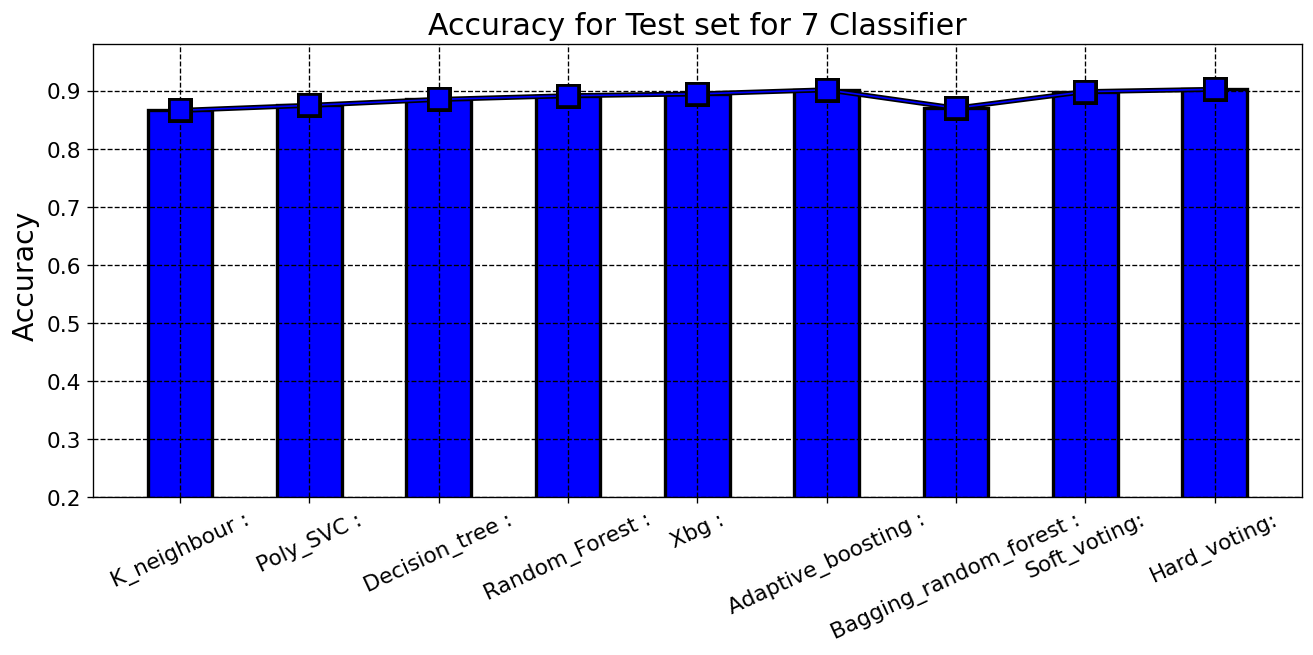

In [99]:
import matplotlib.patheffects as pe

font = {'size'   :13}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(13, 5), dpi= 120, facecolor='w', edgecolor='k')

plt.plot(clf,pre_acc,'bs-',linewidth=1,path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()],
                                                             markersize=12,label='Accuracy',markeredgecolor='k')
ax1.bar(clf,pre_acc,lw =2, align='center',width=0.5, alpha=1, ecolor='black', edgecolor='k',capsize=1,color='b')
plt.ylim((0.2, 0.98)) 
ax1.set_xticklabels(clf, rotation=25)     
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.8)
plt.ylabel('Accuracy ',fontsize='17')
plt.title('Accuracy for Test set for 7 Classifier',fontsize='18')
plt.show()

Hard_voting and adaptive boosting are the best performer on test data.

**DOING THE SAME FOR UPSAMPLED DATA**

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.pipeline import Pipeline

knn_upsampled = KNeighborsClassifier(n_neighbors=1, metric='euclidean')	
svm_upsampled = Pipeline([("svm_clf",SVC(kernel="poly", degree=4, coef0=2, C=53, random_state=42))])
dt_upsampled = DecisionTreeClassifier(max_depth=97, min_samples_leaf=3, min_samples_split=3, random_state = 42)
rf_upsampled = RandomForestClassifier(bootstrap = False, max_depth=49, min_samples_split=2 , n_estimators = 44, random_state = 42)
xbg_upsampled = xgboost.XGBClassifier(learning_rate=1, n_estimators=248, max_depth = 474, random_state = 42)
adaptive_boosting_upsampled = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)
bagging_random_forest_upsampled = BaggingClassifier(RandomForestClassifier(random_state=42),n_estimators=22, random_state = 42, bootstrap = False, max_samples =22)



clf=['K_neighbour :', 'Poly_SVC :', 
     'Decision_tree :','Random_Forest :', 'Xbg :', 'Adaptive_boosting :',
     'Bagging_random_forest :' ]
i=0
pre_acc=[]
for clfier in (knn_upsampled,svm_upsampled, dt_upsampled,rf_upsampled,xbg_upsampled,
               adaptive_boosting_upsampled,bagging_random_forest_upsampled):
    clfier.fit(X_train_Std_up, y_train_up)
    #y_pred = clfier.predict(X_train_new)
    #acc=accuracy_score(y_train, y_pred)
    acc  = cross_val_score(clfier,X_train_Std_up, y_train_up, cv=5, scoring="accuracy")
    
    mean_acc =np.mean(acc)
    pre_acc.append(mean_acc)
    #print(clf[i], mean_acc)
    #pre_acc.append(acc)
    print(clf[i], mean_acc)
    i+=1

K_neighbour : 0.9480637813211846
Poly_SVC : 0.9334851936218678
Decision_tree : 0.9266514806378131
Random_Forest : 0.9735763097949887
Xbg : 0.961731207289294
Adaptive_boosting : 0.9612756264236901
Bagging_random_forest : 0.8127562642369022


Here we see that Adaptive_boosting, Random_Forest, and Xbg

**HARD VOTING**

In [106]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

rf_upsampled = RandomForestClassifier(bootstrap = False, max_depth=49, min_samples_split=2 , n_estimators = 44, random_state = 42)
xbg_upsampled = xgboost.XGBClassifier(learning_rate=1, n_estimators=248, max_depth = 474, random_state = 42)
adaptive_boosting_upsampled = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)

hard_voting = VotingClassifier(estimators=[('random_forest', rf_upsampled ), ('xbg', xbg_upsampled), 
                                           ('adaptive_boosting', adaptive_boosting_upsampled)],voting='hard')
hard_voting.fit(X_train_Std_up, y_train_up)

clf=['Random_forest:', 'Xbg:', 'Adaptive_boosting:', 'Hard Voting:']
i=0
for clfier in (rf_upsampled,xbg_upsampled,adaptive_boosting_upsampled, hard_voting):
    clfier.fit(X_train_Std_up, y_train_up)
    Accuracies=cross_val_score(clfier,X_train_Std_up, y_train_up, cv=5, scoring="accuracy")
    print(clf[i], np.mean(Accuracies))
    
    i+=1

Random_forest: 0.9735763097949887
Xbg: 0.961731207289294
Adaptive_boosting: 0.9612756264236901
Hard Voting: 0.9699316628701595


**SOFT VOTING**

In [109]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

rf_upsampled = RandomForestClassifier(bootstrap = False, max_depth=49, min_samples_split=2 , n_estimators = 44, random_state = 42)
xbg_upsampled = xgboost.XGBClassifier(learning_rate=1, n_estimators=248, max_depth = 474, random_state = 42)
adaptive_boosting_upsampled = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)

soft_voting = VotingClassifier(estimators=[('random_forest', rf_upsampled ), ('xbg', xbg_upsampled), 
                                           ('adaptive_boosting', adaptive_boosting_upsampled)],voting='soft')
soft_voting.fit(X_train_Std_up, y_train_up)

clf=['Random_forest:', 'Xbg:', 'Adaptive_boosting:', 'Soft Voting:']
i=0
for clfier in (rf_upsampled,xbg_upsampled,adaptive_boosting_upsampled, soft_voting):
    clfier.fit(X_train_Std_up, y_train_up)
    Accuracies=cross_val_score(clfier,X_train_Std_up, y_train_up, cv=5, scoring="accuracy")
    print(clf[i], np.mean(Accuracies))
    
    i+=1

Random_forest: 0.9735763097949887
Xbg: 0.961731207289294
Adaptive_boosting: 0.9612756264236901
Soft Voting: 0.966742596810934


**MAKING PLOT FOR UPSAMPLED DATA**

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.pipeline import Pipeline

knn_upsampled = KNeighborsClassifier(n_neighbors=1, metric='euclidean')	
svm_upsampled = Pipeline([("svm_clf",SVC(kernel="poly", degree=4, coef0=2, C=53, random_state=42))])
dt_upsampled = DecisionTreeClassifier(max_depth=97, min_samples_leaf=3, min_samples_split=3, random_state = 42)
rf_upsampled = RandomForestClassifier(bootstrap = False, max_depth=49, min_samples_split=2 , n_estimators = 44, random_state = 42)
xbg_upsampled = xgboost.XGBClassifier(learning_rate=1, n_estimators=248, max_depth = 474, random_state = 42)
adaptive_boosting_upsampled = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)
bagging_random_forest_upsampled = BaggingClassifier(RandomForestClassifier(random_state=42),n_estimators=22, random_state = 42, bootstrap = False, max_samples =22)
soft_voting = VotingClassifier(estimators=[('random_forest', rf_upsampled ), ('xbg', xbg_upsampled), 
                                           ('adaptive_boosting', adaptive_boosting_upsampled)],voting='soft')

hard_voting = VotingClassifier(estimators=[('random_forest', rf_upsampled ), ('xbg', xbg_upsampled), 
                                           ('adaptive_boosting', adaptive_boosting_upsampled)],voting='hard')

clf=['K_neighbour :', 'Poly_SVC :', 
     'Decision_tree :','Random_Forest :', 'Xbg :', 'Adaptive_boosting :',
     'Bagging_random_forest :' , 'Soft_voting :', 'Hard_voting :']
i=0
pre_acc=[]
for clfier in (knn_upsampled,svm_upsampled, dt_upsampled,rf_upsampled,xbg_upsampled,
               adaptive_boosting_upsampled,bagging_random_forest_upsampled , soft_voting , hard_voting):
    clfier.fit(X_train_Std_up, y_train_up)
    #y_pred = clfier.predict(X_train_new)
    #acc=accuracy_score(y_train, y_pred)
    acc  = cross_val_score(clfier,X_train_Std_up, y_train_up, cv=5, scoring="accuracy")
    
    mean_acc =np.mean(acc)
    pre_acc.append(mean_acc)
    #print(clf[i], mean_acc)
    #pre_acc.append(acc)
    print(clf[i], mean_acc)
    i+=1

K_neighbour : 0.9480637813211846
Poly_SVC : 0.9334851936218678
Decision_tree : 0.9266514806378131
Random_Forest : 0.9735763097949887
Xbg : 0.961731207289294
Adaptive_boosting : 0.9612756264236901
Bagging_random_forest : 0.8127562642369022
Soft_voting : 0.966742596810934
Hard_voting : 0.9699316628701595


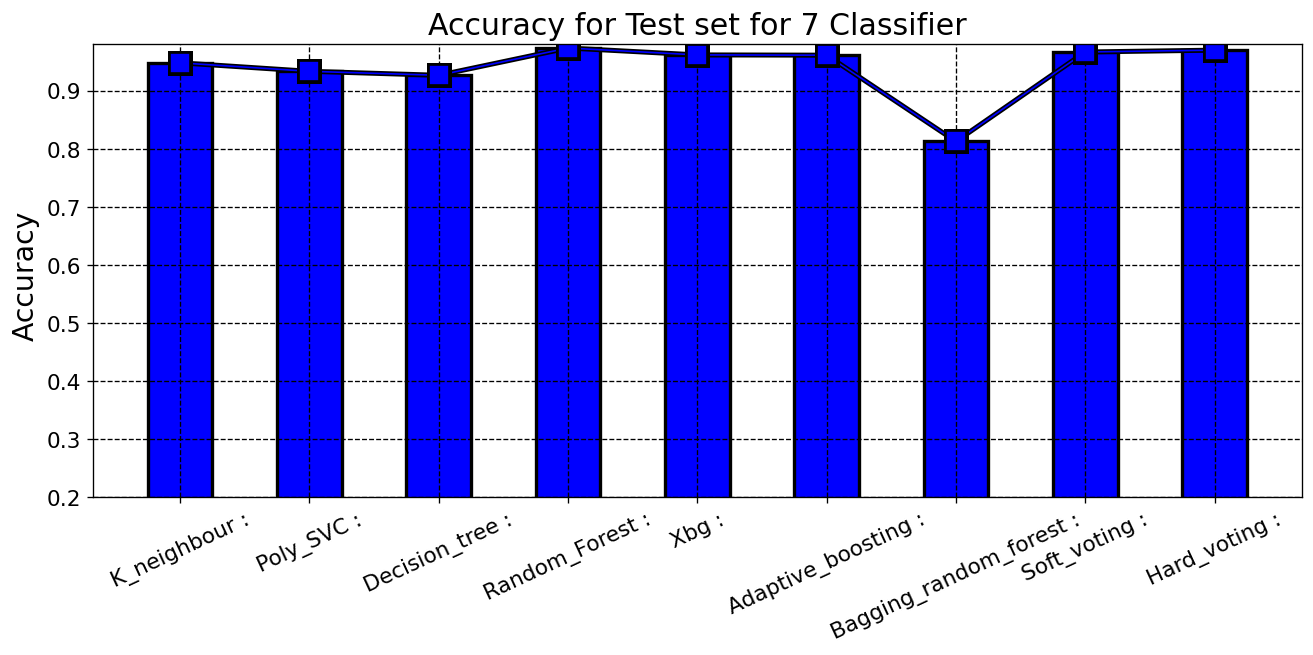

In [111]:
import matplotlib.patheffects as pe

font = {'size'   :13}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(13, 5), dpi= 120, facecolor='w', edgecolor='k')

plt.plot(clf,pre_acc,'bs-',linewidth=1,path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()],
                                                             markersize=12,label='Accuracy',markeredgecolor='k')
ax1.bar(clf,pre_acc,lw =2, align='center',width=0.5, alpha=1, ecolor='black', edgecolor='k',capsize=1,color='b')
plt.ylim((0.2, 0.98)) 
ax1.set_xticklabels(clf, rotation=25)     
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.8)
plt.ylabel('Accuracy ',fontsize='17')
plt.title('Accuracy for Test set for 7 Classifier',fontsize='18')
plt.show()

**Random_Forest and Hard_voting are the best performer in upsampled training data.**

# TESTING

In [112]:
test_set_strat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,0
1,6.9,0.550,0.15,2.2,0.076,19.0,40.0,0.99610,3.41,0.59,10.1,0
2,11.9,0.380,0.51,2.0,0.121,7.0,20.0,0.99960,3.24,0.76,10.4,0
3,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,0
4,7.1,0.430,0.42,5.5,0.071,28.0,128.0,0.99730,3.42,0.71,10.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
313,7.4,0.490,0.27,2.1,0.071,14.0,25.0,0.99388,3.35,0.63,12.0,0
314,12.2,0.480,0.54,2.6,0.085,19.0,64.0,1.00000,3.10,0.61,10.5,0
315,8.0,0.500,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7,0
316,5.6,0.660,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,1


In [113]:
# Note that drop() creates a copy and does not affect train_set_strat
X_test = test_set_strat.drop("wine_quality", axis=1)# remove target
y_test = test_set_strat["wine_quality"].values# only taget values

In [114]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9
1,6.9,0.550,0.15,2.2,0.076,19.0,40.0,0.99610,3.41,0.59,10.1
2,11.9,0.380,0.51,2.0,0.121,7.0,20.0,0.99960,3.24,0.76,10.4
3,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0
4,7.1,0.430,0.42,5.5,0.071,28.0,128.0,0.99730,3.42,0.71,10.5
...,...,...,...,...,...,...,...,...,...,...,...
313,7.4,0.490,0.27,2.1,0.071,14.0,25.0,0.99388,3.35,0.63,12.0
314,12.2,0.480,0.54,2.6,0.085,19.0,64.0,1.00000,3.10,0.61,10.5
315,8.0,0.500,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7
316,5.6,0.660,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8


In [115]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

**STANDRADIZATION OF VARIABLES**

In [116]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()#call StandardScaler.
X_test_im_Std=scaler.transform(X_test)#fit transform
X_test_im_Std

array([[-1.06301308,  1.49801292, -1.48429913, ...,  1.12558862,
        -1.02120083, -0.8538196 ],
       [-0.89958906,  0.43774834, -0.83768566, ...,  0.7330558 ,
        -0.64407069, -0.68040776],
       [ 1.82414465, -0.53654884,  0.95293627, ..., -0.37912054,
         0.42446469, -0.42029   ],
       ...,
       [-0.30036765,  0.15119035,  0.35606229, ...,  0.86390007,
        -0.45550562, -0.16017224],
       [-1.60775983,  1.06817593, -1.58377813, ...,  2.69571993,
        -0.3926506 ,  1.6606521 ],
       [ 0.08095507,  1.29742232, -0.39003018, ...,  0.14425656,
        -0.58121567, -1.63417289]])

In [117]:
X_test_new = pd.DataFrame(X_test_im_Std)
X_test_new [0:10]

,0,1,2,3,4,5,6,7,8,9,10
0,-1.063013,1.498013,-1.484299,3.635668,0.978589,5.039296,2.389374,1.442280,1.125589,-1.021201,-0.853820
1,-0.899589,0.437748,-0.837686,-0.303732,-0.177427,0.372884,-0.055941,-0.174284,0.733056,-0.644071,-0.680408
2,1.824145,-0.536549,0.952936,-0.441957,0.953458,-0.769911,-0.638158,1.540253,-0.379121,0.424465,-0.420290
3,-1.607760,0.151190,-1.136123,-0.234620,-0.855957,0.182418,1.661602,-1.349966,2.172343,-0.392651,1.834064
4,-0.790640,-0.249991,0.505281,1.976974,-0.303080,1.229980,2.505818,0.413558,0.798478,0.110190,-0.333584
5,-0.354842,1.010864,-1.534039,-0.096395,-0.127165,0.182418,-0.114162,-0.076310,0.275101,0.298755,0.706887
6,-0.409317,0.380437,-0.290551,-0.441957,0.124143,0.753815,0.176946,0.805452,0.733056,0.298755,-1.460761
7,-0.790640,1.010864,-0.688467,-0.580181,-0.328211,-0.198514,-0.055941,0.266597,0.929322,-0.581216,-1.547467
8,-0.681690,-0.622516,0.853457,-0.096395,0.124143,2.277542,1.865378,0.070650,0.405945,0.550175,0.099946
9,-0.954064,0.552372,-1.583778,-0.096395,-0.277950,1.610911,0.642721,-0.757226,0.863900,-0.832636,0.273357


In [124]:
X_test = X_test_new.rename({0: 'fixed acidity', 1: 'volatile acidity', 2: 'citric acid', 3: 'residual sugar', 4: 'chlorides', 5: 'free sulfur dioxide', 6: 'total sulfur dioxide', 7: 'density', 8: 'pH' , 9: 'sulphates', 10: 'alcohol' }, axis=1)
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.063013,1.498013,-1.484299,3.635668,0.978589,5.039296,2.389374,1.442280,1.125589,-1.021201,-0.853820
1,-0.899589,0.437748,-0.837686,-0.303732,-0.177427,0.372884,-0.055941,-0.174284,0.733056,-0.644071,-0.680408
2,1.824145,-0.536549,0.952936,-0.441957,0.953458,-0.769911,-0.638158,1.540253,-0.379121,0.424465,-0.420290
3,-1.607760,0.151190,-1.136123,-0.234620,-0.855957,0.182418,1.661602,-1.349966,2.172343,-0.392651,1.834064
4,-0.790640,-0.249991,0.505281,1.976974,-0.303080,1.229980,2.505818,0.413558,0.798478,0.110190,-0.333584
...,...,...,...,...,...,...,...,...,...,...,...
313,-0.627216,0.093879,-0.240812,-0.372844,-0.303080,-0.103281,-0.492604,-1.261790,0.340523,-0.392651,0.967005
314,1.987569,0.036567,1.102155,-0.027283,0.048750,0.372884,0.642721,1.736200,-1.295030,-0.518361,-0.333584
315,-0.300368,0.151190,0.356062,-0.027283,-0.026642,-0.293747,0.118725,1.001399,0.863900,-0.455506,-0.160172
316,-1.607760,1.068176,-1.583778,-0.303732,0.099012,-1.150843,-0.900156,-1.310777,2.695720,-0.392651,1.660652


In [ ]:
final_algo = pd.DataFrame({']})

In [126]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [127]:
y_test = pd.DataFrame(y_test)
y_test = y_test.rename({0: 'Y_test'}, axis=1)
y_test

,Y_test
0,0
1,0
2,0
3,0
4,0
...,...
313,0
314,0
315,0
316,1


In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svm = Pipeline([("svm_clf",SVC(kernel="poly", degree=2, coef0=2, C=8, random_state=42))])
dt = DecisionTreeClassifier(max_depth=11, min_samples_leaf=39, min_samples_split=10, random_state = 42)
rf = RandomForestClassifier(bootstrap = True, max_depth=17, min_samples_split=9 , n_estimators = 64, random_state = 42)
xbg = xgboost.XGBClassifier(learning_rate=1, n_estimators=219, max_depth = 129, random_state = 42)
adaptive_boosting = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)
bagging_random_forest = BaggingClassifier(RandomForestClassifier(random_state=42),n_estimators=2, random_state = 42, bootstrap = False, max_samples =26)
soft_voting = VotingClassifier(estimators=[('random_forest', rf ), ('xbg', xbg), 
                                           ('adaptive_boosting', adaptive_boosting)],voting='soft')
hard_voting = VotingClassifier(estimators=[('random_forest', rf ), ('xbg', xbg), 
                                           ('adaptive_boosting', adaptive_boosting)],voting='hard')

clf=['K_neighbour :', 'Poly_SVC :', 
     'Decision_tree :','Random_Forest :', 'Xbg :', 'Adaptive_boosting :',
     'Bagging_random_forest :' , 'Soft_voting :', 'Hard_voting :']
i=0
pre_acc=[]
for clfier in (knn,svm, dt,rf,xbg,
               adaptive_boosting,bagging_random_forest , soft_voting , hard_voting):
    clfier.fit(X_test , y_test)
    #y_pred = clfier.predict(X_train_new)
    #acc=accuracy_score(y_train, y_pred)
    acc  = cross_val_score(clfier,X_test, y_test, cv=5, scoring="accuracy")
    
    mean_acc =np.mean(acc)
    pre_acc.append(mean_acc)
    #print(clf[i], mean_acc)
    #pre_acc.append(acc)
    print(clf[i], mean_acc)
    i+=1

K_neighbour : 0.7988095238095237
Poly_SVC : 0.8615079365079363
Decision_tree : 0.8648313492063492
Random_Forest : 0.8773809523809524
Xbg : 0.883531746031746
Adaptive_boosting : 0.8805059523809524
Bagging_random_forest : 0.8680059523809524
Soft_voting : 0.8930555555555555
Hard_voting : 0.8867559523809524


**Soft_voting, Hard_voting are the best performer on test data. Hard Voting is the best performer on both traing and test data.**

**STACKING**

In [134]:
from sklearn.model_selection import cross_val_predict

xbg = xgboost.XGBClassifier(learning_rate=1, n_estimators=219, max_depth = 129, random_state = 42)
adaptive_boosting = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)

soft_voting = VotingClassifier(estimators=[('random_forest', rf ), ('xbg', xbg), 
                                           ('adaptive_boosting', adaptive_boosting)],voting='soft')
hard_voting = VotingClassifier(estimators=[('random_forest', rf ), ('xbg', xbg), 
                                           ('adaptive_boosting', adaptive_boosting)],voting='hard')

estimators=[xbg ,adaptive_boosting,soft_voting , hard_voting ]
x_Predictions = np.zeros((len(X_train), len(estimators)), dtype=np.float32)

# Apply estimators on Validation data set
for index, estimator in enumerate(estimators):
    estimator.fit(X_train, y_train)#applying predictiosn on training datset
    y_pred = cross_val_predict(estimator, X_train, y_train, cv=5)
    x_Predictions[:, index] = np.ravel(y_pred)#predcitions r now assumed as. a new dataset

# Train a new Random Forest for prediction    
New_rnd = RandomForestClassifier()#always a good idea
New_rnd.fit(x_Predictions, y_train)#fit the new model to X_predictions and taget of the training set

#TEST
# Predict result by stacking on test set
x_test_predictions = np.zeros((len(X_test), len(estimators)), dtype=np.float32)
for index, estimator in enumerate(estimators):
    x_test_predictions[:, index] = np.ravel(estimator.predict(X_test))
    
y_pred = New_rnd.predict(x_test_predictions)
acc=accuracy_score(y_test, y_pred)

pre_acc.append(acc)

clf=clf+['stacking']
print('Stacking ', acc)

Stacking  0.8490566037735849


# TEST TRAINING UPSAMPLED

In [135]:
X_test_up

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
999,6.9,0.49,0.10,2.30,0.074,12.0,30.0,0.99590,3.42,0.58,10.20
1400,8.7,0.48,0.30,2.80,0.066,10.0,28.0,0.99640,3.33,0.67,11.20
1536,6.8,0.64,0.10,2.10,0.085,18.0,101.0,0.99560,3.34,0.52,10.20
1568,6.9,0.84,0.21,4.10,0.074,16.0,65.0,0.99842,3.53,0.72,9.25
449,11.6,0.53,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.50
...,...,...,...,...,...,...,...,...,...,...,...
997,8.9,0.75,0.14,2.50,0.086,9.0,30.0,0.99824,3.34,0.64,10.50
474,7.3,0.48,0.32,2.10,0.062,31.0,54.0,0.99728,3.30,0.65,10.00
1566,8.2,0.28,0.40,2.40,0.052,4.0,10.0,0.99356,3.33,0.70,12.80
1023,7.8,0.57,0.09,2.30,0.065,34.0,45.0,0.99417,3.46,0.74,12.70


In [136]:
y_test_up

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,

**STANDRADIZATION OF VARIABLES**

In [137]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()#call StandardScaler.
X_test_im_Std_up=scaler.transform(X_test_up)#fit transform
X_test_im_Std_up

array([[-0.89958906,  0.09387875, -1.08638315, ...,  0.79847794,
        -0.70692571, -0.59370184],
       [ 0.08095507,  0.03656715, -0.09159319, ...,  0.2096787 ,
        -0.14123051,  0.27335737],
       [-0.95406374,  0.95355273, -1.08638315, ...,  0.27510083,
        -1.08405585, -0.59370184],
       ...,
       [-0.1914183 , -1.10966482,  0.40580179, ...,  0.2096787 ,
         0.04733456,  1.6606521 ],
       [-0.40931699,  0.55237154, -1.13612265, ...,  1.06016649,
         0.29875465,  1.57394618],
       [ 0.0264804 , -1.45353442,  0.2068438 , ...,  1.12558862,
         1.11586994,  0.09994553]])

In [138]:
X_test_new_up = pd.DataFrame(X_test_im_Std_up)
X_test_new_up [0:10]

,0,1,2,3,4,5,6,7,8,9,10
0,-0.899589,0.093879,-1.086383,-0.234620,-0.227688,-0.293747,-0.347050,-0.272257,0.798478,-0.706926,-0.593702
1,0.080955,0.036567,-0.091593,0.110942,-0.428734,-0.484213,-0.405271,-0.027323,0.209679,-0.141231,0.273357
2,-0.954064,0.953553,-1.086383,-0.372844,0.048750,0.277651,1.719824,-0.419217,0.275101,-1.084056,-0.593702
3,-0.899589,2.099785,-0.539249,1.009402,-0.227688,0.087185,0.671832,0.962209,1.518121,0.173045,-1.417408
4,1.660721,0.323125,1.699029,0.698396,0.953458,-0.865144,-0.812824,0.658492,-1.622141,0.298755,0.533475
5,-1.063013,2.099785,-1.434560,-0.234620,-0.604650,1.610911,0.176946,-0.615164,1.452699,-0.832636,1.227122
6,-0.409317,0.552372,-1.136123,-0.234620,-0.453865,1.801377,0.089614,-1.119728,1.060166,0.298755,1.573946
7,-0.790640,1.583980,-1.534039,-0.303732,-0.604650,-0.388980,-0.696380,-1.976997,0.602212,-1.838316,1.660652
8,0.189904,-1.052353,0.157104,-0.511069,-0.403604,0.944281,0.438944,0.266597,-0.771653,4.195766,-0.506996
9,1.061499,0.208502,1.599550,-0.165507,0.601627,-0.865144,-0.783713,0.413558,-1.360453,-0.204086,0.793593


In [139]:
X_test_up = X_test_new_up.rename({0: 'fixed acidity', 1: 'volatile acidity', 2: 'citric acid', 3: 'residual sugar', 4: 'chlorides', 5: 'free sulfur dioxide', 6: 'total sulfur dioxide', 7: 'density', 8: 'pH' , 9: 'sulphates', 10: 'alcohol' }, axis=1)
X_test_up

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.899589,0.093879,-1.086383,-0.234620,-0.227688,-0.293747,-0.347050,-0.272257,0.798478,-0.706926,-0.593702
1,0.080955,0.036567,-0.091593,0.110942,-0.428734,-0.484213,-0.405271,-0.027323,0.209679,-0.141231,0.273357
2,-0.954064,0.953553,-1.086383,-0.372844,0.048750,0.277651,1.719824,-0.419217,0.275101,-1.084056,-0.593702
3,-0.899589,2.099785,-0.539249,1.009402,-0.227688,0.087185,0.671832,0.962209,1.518121,0.173045,-1.417408
4,1.660721,0.323125,1.699029,0.698396,0.953458,-0.865144,-0.812824,0.658492,-1.622141,0.298755,0.533475
...,...,...,...,...,...,...,...,...,...,...,...
544,0.189904,1.583980,-0.887425,-0.096395,0.073881,-0.579446,-0.347050,0.874033,0.275101,-0.329796,-0.333584
545,-0.681690,0.036567,0.007886,-0.372844,-0.529257,1.515678,0.351612,0.403760,0.013412,-0.266941,-0.767114
546,-0.191418,-1.109665,0.405802,-0.165507,-0.780565,-1.055610,-0.929267,-1.418547,0.209679,0.047335,1.660652
547,-0.409317,0.552372,-1.136123,-0.234620,-0.453865,1.801377,0.089614,-1.119728,1.060166,0.298755,1.573946


In [146]:
y_test_up = pd.DataFrame(y_test_up)
y_test_up = y_test_up.rename({0: 'Y_test_up'}, axis=1)
y_test_up

,Y_test
0,0
1,1
2,0
3,0
4,1
...,...
544,0
545,1
546,1
547,1


In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.pipeline import Pipeline

knn_upsampled = KNeighborsClassifier(n_neighbors=1, metric='euclidean')	
svm_upsampled = Pipeline([("svm_clf",SVC(kernel="poly", degree=4, coef0=2, C=53, random_state=42))])
dt_upsampled = DecisionTreeClassifier(max_depth=97, min_samples_leaf=3, min_samples_split=3, random_state = 42)
rf_upsampled = RandomForestClassifier(bootstrap = False, max_depth=49, min_samples_split=2 , n_estimators = 44, random_state = 42)
xbg_upsampled = xgboost.XGBClassifier(learning_rate=1, n_estimators=248, max_depth = 474, random_state = 42)
adaptive_boosting_upsampled = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)
bagging_random_forest_upsampled = BaggingClassifier(RandomForestClassifier(random_state=42),n_estimators=22, random_state = 42, bootstrap = False, max_samples =22)
soft_voting = VotingClassifier(estimators=[('random_forest', rf_upsampled ), ('xbg', xbg_upsampled), 
                                           ('adaptive_boosting', adaptive_boosting_upsampled)],voting='soft')

hard_voting = VotingClassifier(estimators=[('random_forest', rf_upsampled ), ('xbg', xbg_upsampled), 
                                           ('adaptive_boosting', adaptive_boosting_upsampled)],voting='hard')

clf=['K_neighbour :', 'Poly_SVC :', 
     'Decision_tree :','Random_Forest :', 'Xbg :', 'Adaptive_boosting :',
     'Bagging_random_forest :' , 'Soft_voting :', 'Hard_voting :']
i=0
pre_acc=[]
for clfier in (knn_upsampled,svm_upsampled, dt_upsampled,rf_upsampled,xbg_upsampled,
               adaptive_boosting_upsampled,bagging_random_forest_upsampled , soft_voting , hard_voting):
    clfier.fit(X_test , y_test)
    #y_pred = clfier.predict(X_train_new)
    #acc=accuracy_score(y_train, y_pred)
    acc  = cross_val_score(clfier,X_test_up, y_test_up, cv=5, scoring="accuracy")
    
    mean_acc =np.mean(acc)
    pre_acc.append(mean_acc)
    #print(clf[i], mean_acc)
    #pre_acc.append(acc)
    print(clf[i], mean_acc)
    i+=1

K_neighbour : 0.866955796497081
Poly_SVC : 0.8540950792326939
Decision_tree : 0.8251042535446207
Random_Forest : 0.8832860717264387
Xbg : 0.872393661384487
Adaptive_boosting : 0.8941951626355296
Bagging_random_forest : 0.7794995829858216
Soft_voting : 0.8869557964970809
Hard_voting : 0.8851042535446204


Adaptive_boosting, Soft and Hard Voting is best performer for upsampled test data.  Hard_voting are the best performer in upsampled data.

**STACKING**

In [144]:
soft_voting = VotingClassifier(estimators=[('random_forest', rf_upsampled ), ('xbg', xbg_upsampled), 
                                           ('adaptive_boosting', adaptive_boosting_upsampled)],voting='soft')

hard_voting = VotingClassifier(estimators=[('random_forest', rf_upsampled ), ('xbg', xbg_upsampled), 
                                           ('adaptive_boosting', adaptive_boosting_upsampled)],voting='hard')

xbg_upsampled = xgboost.XGBClassifier(learning_rate=1, n_estimators=248, max_depth = 474, random_state = 42)
adaptive_boosting_upsampled = AdaBoostClassifier(RandomForestClassifier(random_state=42), algorithm = 'SAMME.R', learning_rate=1, n_estimators=75, random_state = 42)


estimators=[soft_voting,hard_voting,xbg_upsampled,adaptive_boosting_upsampled]
x_Predictions = np.zeros((len(X_train_up), len(estimators)), dtype=np.float32)

# Apply estimators on Validation data set
for index, estimator in enumerate(estimators):
    estimator.fit(X_train_up, y_train_up)#applying predictiosn on training datset
    y_pred = cross_val_predict(estimator, X_train_up, y_train_up, cv=5)
    x_Predictions[:, index] = np.ravel(y_pred)#predcitions r now assumed as. a new dataset

# Train a new Random Forest for prediction    
New_rnd = RandomForestClassifier()#always a good idea
New_rnd.fit(x_Predictions, y_train_up)#fit the new model to X_predictions and taget of the training set

#TEST
# Predict result by stacking on test set
x_test_predictions = np.zeros((len(X_test_up), len(estimators)), dtype=np.float32)
for index, estimator in enumerate(estimators):
    x_test_predictions[:, index] = np.ravel(estimator.predict(X_test_up))
    
y_pred = New_rnd.predict(x_test_predictions)
acc=accuracy_score(y_test_up, y_pred)

pre_acc.append(acc)

clf=clf+['stacking']
print('Stacking ', acc)

Stacking  0.5136612021857924


There is poor performance with stacking.

CONCLUSIONS:
- Upsampled data performs better. 

GIVEN DATA
- The performance on training data is 90%.
- The performance on upsampled test data is 89%.
- Hard Voting is the best performer on both training and test data.

UPSAMPLED DATA
- The performance on upsampled training data is 97%.
- The performance on upsampled test data is 89%.
- Hard_voting are the best performer in upsampled training and test data.